## EDA

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [140]:
df = pd.read_csv("https://raw.githubusercontent.com/sirine707/Skill_Recommender/refs/heads/Feature_Sirine/EDA/Base_Etudiant.csv")

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_et                  2621 non-null   object 
 1   date_nais_et           2621 non-null   object 
 2   lieu_nais_et           2619 non-null   object 
 3   date_bac               2259 non-null   object 
 4   etab_bac               2457 non-null   object 
 5   niveau_diplome_sup_et  2259 non-null   float64
 6   lib_specialite_esp_et  2621 non-null   object 
 7   date_entree_esp_et     1388 non-null   object 
 8   lib_nature_bac         2563 non-null   object 
 9   classe_courante_et     2621 non-null   object 
 10  classe_sem1            2369 non-null   object 
 11  niveau_courant_et      2621 non-null   int64  
 12  sexe                   2621 non-null   object 
 13  nationalite            2619 non-null   object 
 14  niveau_acces           2621 non-null   int64  
 15  clas

In [142]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

lieu_nais_et: 0.0008% missing values
date_bac: 0.1381% missing values
etab_bac: 0.0626% missing values
date_entree_esp_et: 0.4704% missing values
lib_nature_bac: 0.0221% missing values
classe_sem1: 0.0961% missing values
nationalite: 0.0008% missing values
classe_prec_et: 0.3453% missing values
resultat_annee_prec: 0.3571% missing values
gouvernorat: 0.1702% missing values


In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
niveau_diplome_sup_et,2259.0,0.691014,1.233990,0.0,0.0000,0.00,1.0000,3.00
niveau_courant_et,2621.0,1.839756,0.839551,1.0,1.0000,2.00,2.0000,4.00
niveau_acces,2621.0,2.688668,1.378122,1.0,1.0000,3.00,4.0000,5.00
moy_bac,2522.0,11.096622,1.884248,9.0,10.0825,10.77,11.7875,76.35
score_final,2621.0,-0.542774,5.143817,-1.0,-1.0000,-1.00,-1.0000,75.08


In [144]:
df.isnull().sum()


id_et                       0
date_nais_et                0
lieu_nais_et                2
date_bac                  362
etab_bac                  164
niveau_diplome_sup_et     362
lib_specialite_esp_et       0
date_entree_esp_et       1233
lib_nature_bac             58
classe_courante_et          0
classe_sem1               252
niveau_courant_et           0
sexe                        0
nationalite                 2
niveau_acces                0
classe_prec_et            905
resultat_annee_prec       936
moy_bac                    99
score_final                 0
gouvernorat               446
dtype: int64

In [145]:
#df_copy is deep copy of df
df_copy= df.copy(deep=True)
df_copy

,id_et,date_nais_et,lieu_nais_et,date_bac,etab_bac,niveau_diplome_sup_et,lib_specialite_esp_et,date_entree_esp_et,lib_nature_bac,classe_courante_et,classe_sem1,niveau_courant_et,sexe,nationalite,niveau_acces,classe_prec_et,resultat_annee_prec,moy_bac,score_final,gouvernorat
0,ID1,10/07/1996 00:00,Tunis,NaN,NaN,NaN,Master Professionnel en Business Analytics,NaN,NaN,2-BA-2,2-BA-2,2,M,TUNISIENNE,5,1-BA-2,Admis,NaN,-1.0,NaN
1,ID2,19/12/2002 00:00,TUNIS,01/06/2021 00:00,Lycée Secondaire Ezzahra,3.0,Master Professionnel en Marketing Digital,16/09/2024 00:00,Bac Informatique,1-MKD-1,---,1,M,TUNISIENNE,4,NaN,NaN,12.91,-1.0,Ben Arous
2,ID3,09/08/2003 00:00,TUNIS,01/06/2024 00:00,Lycee Secondaire ASDRUBAL BARDO,0.0,Licence en Sciences de Gestion,30/08/2024 00:00,Bac Economie,1-LSG-1,1-LSG-1,1,M,TUNISIENNE,1,NaN,NaN,9.81,-1.0,Ariana
3,ID4,15/09/1999 00:00,TUNIS,NaN,Lycée les pères blancs,NaN,Master Professionnel en Management Digital et ...,NaN,Bac Economie-gestion,1-MDSI-1,1-MDSI-1,1,F,TUNISIENNE,4,3-LSG-4,ADMISE Mention Assez Bien,12.00,-1.0,NaN
4,ID5,17/10/1999 00:00,Bizerte,01/06/2020 00:00,Lycée Bhira Bizerte,0.0,Licence en Sciences de Gestion,18/09/2023 00:00,Bac Economie,2-LSG-3,2-LSG-3,2,M,TUNISIENNE,2,1-LSG-8,ADMIS Mention Passable,10.48,-1.0,Bizerte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,ID2617,12/12/2000 00:00,Tunis,01/06/2022 00:00,Tunis 2,0.0,Licence Business Computing- Parcours Business...,NaN,Bac Economie,3LBC-BIS-5,3LBC-BIS-5,3,M,TUNISIENNE,3,2-LBC-BIS5,ADMIS Mention Passable,11.12,-1.0,Ariana
2617,ID2618,08/01/2005 00:00,Le kef,01/06/2023 00:00,Kef,0.0,Licence Business Computing,NaN,Bac Sciences expérimentales,2-LBC-6,2-LBC-6,2,M,TUNISIENNE,2,1-LBC-9,ADMIS Mention Bien,10.96,-1.0,Le Kef
2618,ID2619,20/06/2004 00:00,La marsa,01/06/2023 00:00,Lycee l'Aouina,0.0,Licence en Sciences de Gestion,28/08/2023 00:00,Bac Economie,2-LSG-3,2-LSG-3,2,M,TUNISIENNE,2,1-LSG-3,ADMIS Avec 10 ECTS non acquis,10.18,-1.0,Tunis
2619,ID2620,21/01/2004 00:00,Tunis,01/06/2022 00:00,La marsa,0.0,Licence en Sciences de Gestion -Parcours Compt...,NaN,Bac Sciences expérimentales,3-LSC-2,3-LSC-2,3,F,TUNISIENNE,3,2-LSC-2,ADMISE Mention Assez Bien,12.57,-1.0,Tunis


In [146]:
#ampute these categorical values
df_copy.drop(["etab_bac","gouvernorat","classe_sem1","sexe",'score_final', 'lieu_nais_et','id_et'],axis=1,inplace=True)

In [147]:
#drop duplicate rows
df_copy.drop_duplicates(inplace=True)

In [148]:
df_copy.dropna(subset=['classe_prec_et','resultat_annee_prec'],inplace=True)

array([[<Axes: title={'center': 'niveau_diplome_sup_et'}>,
        <Axes: title={'center': 'niveau_courant_et'}>],
       [<Axes: title={'center': 'niveau_acces'}>,
        <Axes: title={'center': 'moy_bac'}>]], dtype=object)

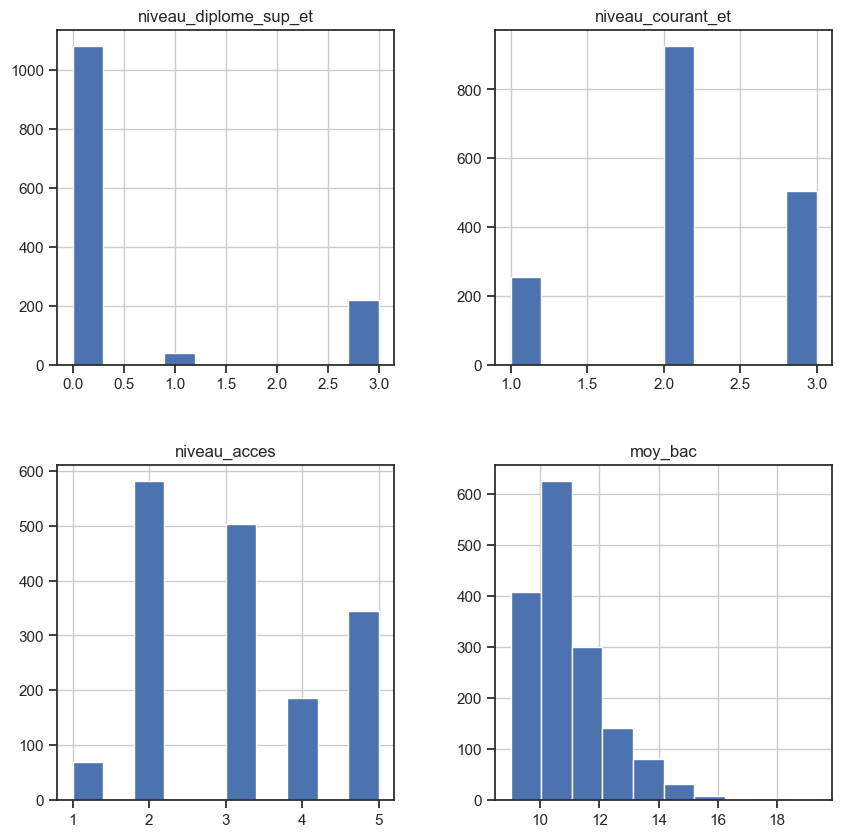

In [149]:
#to understand how to fill the missing values using the mean or the median or the mode , reprsent the distribution of the data
df_copy.hist(figsize=(10,10))

In [150]:
# fill nan values in 'niveau_diplome_sup_et' if 'lib_specialite_esp_et' starts with Master res=3 else fill with most frequent value(mode)
df_copy['niveau_diplome_sup_et'].fillna(df_copy['lib_specialite_esp_et'].apply(lambda x:x.startswith('Master')).map({True:3,False:df_copy['niveau_diplome_sup_et'].mode()[0]}),inplace=True)

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\3883300089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['niveau_diplome_sup_et'].fillna(df_copy['lib_specialite_esp_et'].apply(lambda x:x.startswith('Master')).map({True:3,False:df_copy['niveau_diplome_sup_et'].mode()[0]}),inplace=True)


In [151]:
# Fill missing values with the mean of each column
df_copy[['moy_bac']] = df_copy[[ 'moy_bac']].fillna(df_copy[['moy_bac']].mean())

In [152]:
#find the frequent gap between column date_bac and date_nais_et
from datetime import datetime

# Convert the date columns to datetime objects
df['date_bac'] = pd.to_datetime(df['date_bac'], format='%d/%m/%Y %H:%M', errors='coerce')
df['date_nais_et'] = pd.to_datetime(df['date_nais_et'], format='%d/%m/%Y %H:%M', errors='coerce')

# Calculate the gap and find the most frequent gap
frequent_gap = (df['date_bac'] - df['date_nais_et']).mean()
frequent_gap
#conert frequent_gap to years
frequent_gap = int(frequent_gap.days / 365)
frequent_gap

19

In [153]:
from datetime import datetime

def convert_date(date_naiss):
    # Convert Timestamp to string if needed
    if isinstance(date_naiss, pd.Timestamp):
        date_naiss = date_naiss.strftime('%d/%m/%Y %H:%M')

    date_obj = datetime.strptime(date_naiss, '%d/%m/%Y %H:%M')
    us_format = date_obj.strftime('%d/%m/%Y %H:%M')
    year = int(us_format[6:10]) + 19
    return '01/06/' + str(year) + ' 00:00'

In [154]:
print(convert_date(df['date_nais_et'].loc[df['id_et']=='ID619'].iloc[0]))

01/06/2024 00:00


In [155]:
#fill missing value of df_copy['date_bac'] with the result of the function convert_date
df_copy['date_bac'].fillna(df['date_nais_et'].apply(convert_date),inplace=True)
print(df_copy['date_bac'].iloc[0])

01/06/2015 00:00


C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\4189537486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['date_bac'].fillna(df['date_nais_et'].apply(convert_date),inplace=True)


In [156]:
# Convert missing values in date_entree_esp_et based on the value in lib_nature_bac
#niveau accès represent years of studies at esb
def convert_date_entree_esp_et(row):
    if row['lib_specialite_esp_et'].startswith('Licence') or row['niveau_acces']>2:
      #adds condition if class courante starts with 1
       start_date = row['date_bac']
    else:
      # if classe precedente !=nan
        start_date = str("16/09/") + str(int(row['date_bac'][6:10]) + 3) + row['date_bac'][10:]
    return start_date


In [157]:
# Fill missing values in date_entree_esp_et
df_copy['date_entree_esp_et'].fillna(df_copy.apply(convert_date_entree_esp_et, axis=1), inplace=True)

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\2939815041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['date_entree_esp_et'].fillna(df_copy.apply(convert_date_entree_esp_et, axis=1), inplace=True)


In [158]:
df_copy.columns

Index(['date_nais_et', 'date_bac', 'niveau_diplome_sup_et',
       'lib_specialite_esp_et', 'date_entree_esp_et', 'lib_nature_bac',
       'classe_courante_et', 'niveau_courant_et', 'nationalite',
       'niveau_acces', 'classe_prec_et', 'resultat_annee_prec', 'moy_bac'],
      dtype='object')

In [159]:
#fillissing values in nationalite by the most frequent value
df_copy['nationalite'].fillna(df_copy['nationalite'].mode()[0],inplace=True)

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\2429789071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['nationalite'].fillna(df_copy['nationalite'].mode()[0],inplace=True)


In [160]:
#clean the column 'lib_nature_bac' by replacing 'Bac Economie-gestion' with 'Bac Economie'
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.lower().str.strip()
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace(r'\bbac economie-gestion\b|\beconomique et social\b', 'bac economie', regex=True)
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace('bac téchnique', 'bac technique')
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace('bac sciences expérimentales','scientifique')
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace(r'\bbac français\b|\bbac général\b', 'autre bac', regex=True)

# Fill missing values in 'lib_nature_bac' with the mode
mode_value = df_copy['lib_nature_bac'].mode()[0]
df_copy['lib_nature_bac'].fillna(mode_value, inplace=True)

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\740786003.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['lib_nature_bac'].fillna(mode_value, inplace=True)


In [161]:
#remove the last 2 caracters in the column 'classe_prec_et' and 'classe_courante_et'
df_copy['classe_prec_et'] = df_copy['classe_prec_et'].apply(lambda x: x[:-2])
df_copy['classe_courante_et'] = df_copy['classe_courante_et'].apply(lambda x: x[:-2])

In [162]:
#clean the column=[classe_courante_et,classe_courante_et,classe_prec_et] by removing the first character or 2 first characters if 2nd character is a '-'
df_copy['classe_courante_et'] = df_copy['classe_courante_et'].apply(lambda x: x[2:] if x[1] == '-' else x[1:])
df_copy['classe_prec_et'] = df_copy['classe_prec_et'].apply(lambda x: x[2:] if x[1] == '-' else x[1:])


In [163]:
#convert resultat_annee_prec into lowercase and remove extra spaces and leading spaces and for startwith(Admise) turn it into admis
for i in range(2):
    df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'admis' if x.startswith('admise') else x)
    df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'exclu' if x.startswith('exclue') else x)
    df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: ' '.join(x.lower().strip().split()))

In [164]:
# Convert column date_nais_et into an Age column and take the current year as 2024
now = pd.Timestamp('now').year
df_copy['date_nais_et'] = pd.to_datetime(df_copy['date_nais_et'], format='%d/%m/%Y %H:%M', errors='coerce')
# Create a new column 'age' and drop the column 'date_nais_et'
df_copy['age'] = now - df_copy['date_nais_et'].dt.year
df_copy.drop(['date_nais_et'], axis=1, inplace=True)

In [165]:
# transform features dates into year format
import datetime
columns_to_transform = ['date_bac','date_entree_esp_et']
for col in columns_to_transform:
    df_copy[col] = df_copy[col].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M').year)

## Detect outliers


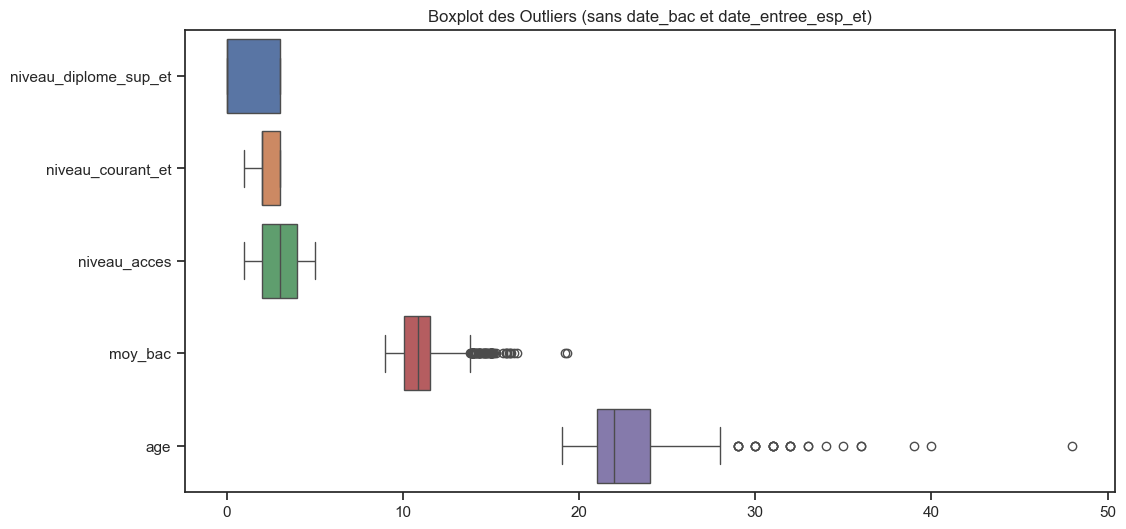

In [166]:
df_clean = df_copy.drop(columns=['date_bac', 'date_entree_esp_et'])

# Créer le boxplot pour les autres colonnes
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_clean, orient='h')
ax.set_title('Boxplot des Outliers (sans date_bac et date_entree_esp_et)')
plt.show()

In [167]:
# Define the outliers function
def replace_outliers_with_bounds(df, name_col):
    Q1 = df[name_col].quantile(0.25)
    Q3 = df[name_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with bounds
    df[name_col] = np.where(df[name_col] < lower_bound, lower_bound, df[name_col])
    df[name_col] = np.where(df[name_col] > upper_bound, upper_bound, df[name_col])

# Call the function to replace outliers
replace_outliers_with_bounds(df_copy, 'moy_bac')
replace_outliers_with_bounds(df_copy, 'age')

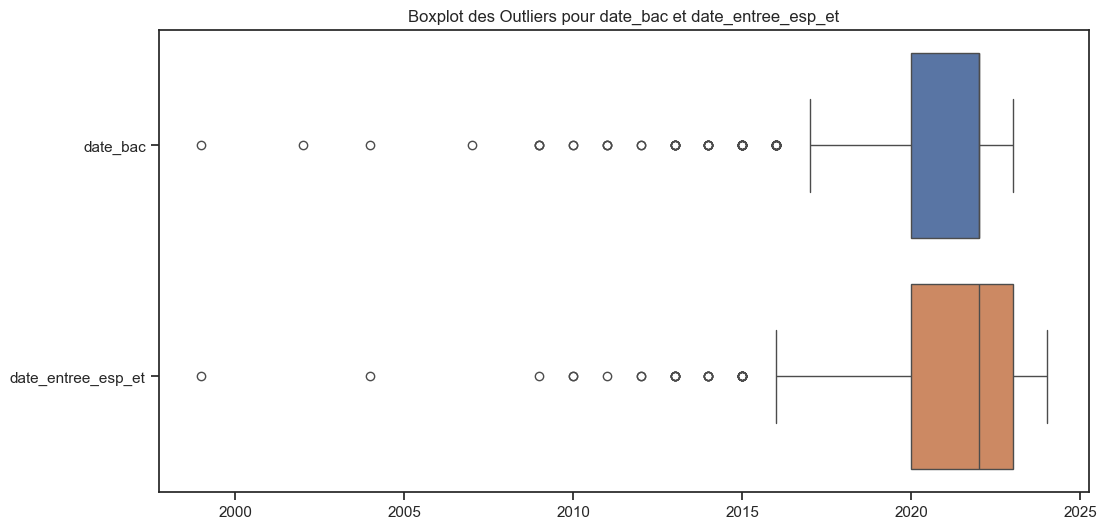

In [168]:
df_dates = df_copy[['date_bac', 'date_entree_esp_et']]

plt.figure(figsize=(12, 6))
ax_dates = sns.boxplot(data=df_dates, orient='h')
ax_dates.set_title('Boxplot des Outliers pour date_bac et date_entree_esp_et')
plt.show()

In [169]:
# Dictionnaire pour stocker les outliers
outliers = {}

# Parcours des colonnes (date_bac et date_entree_esp_et)
for column in ['date_bac', 'date_entree_esp_et']:
    # Calcul des bornes et de l'IQR pour chaque colonne
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Identifier les outliers (valeurs en dehors des bornes)
outliers[column] = df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)]

# Remplacer les outliers par la borne inférieure ou supérieure
df_copy.loc[df_copy[column] < lower_bound, column] = lower_bound
df_copy.loc[df_copy[column] > upper_bound, column] = upper_bound

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\3634602412.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2015.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy[column] < lower_bound, column] = lower_bound


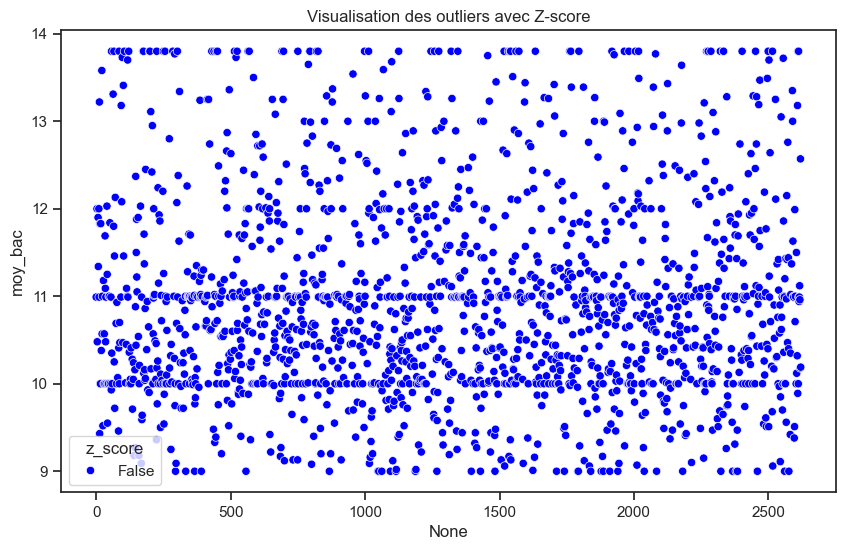

In [170]:
#Visualisation des valeurs aberrante de la variable moy_bac avec Z_score:
from scipy.stats import zscore

df_copy['z_score'] = zscore(df_copy['moy_bac'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x=df_copy.index, y='moy_bac', hue=abs(df_copy['z_score']) > 3, palette={True: 'red', False: 'blue'})
plt.title("Visualisation des outliers avec Z-score")
plt.show()

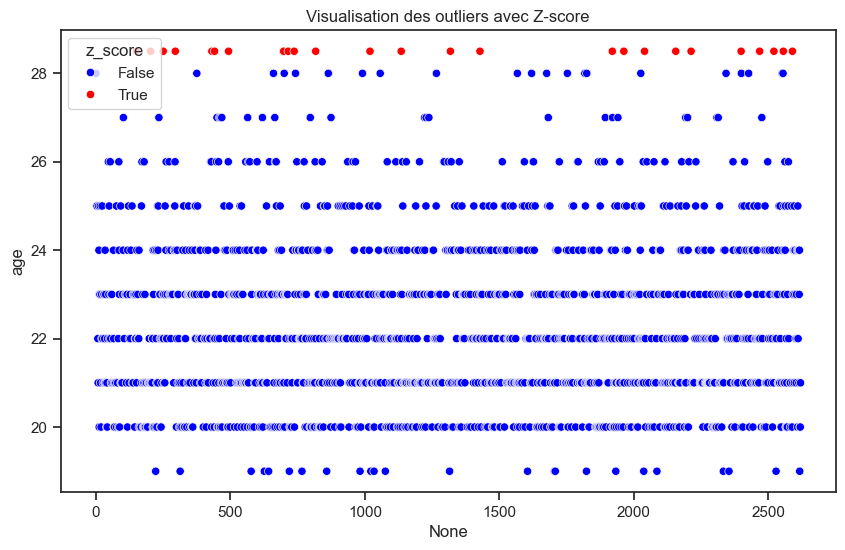

In [171]:
#Visualisation des valeurs aberrante de la variable age avec Z_score:
from scipy.stats import zscore

df_copy['z_score'] = zscore(df_copy['age'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x=df_copy.index, y='age', hue=abs(df_copy['z_score']) > 3, palette={True: 'red', False: 'blue'})
plt.title("Visualisation des outliers avec Z-score")
plt.show()

In [172]:
df_copy.drop(columns=['z_score'], inplace=True)

<Axes: xlabel='resultat_annee_prec', ylabel='moy_bac'>

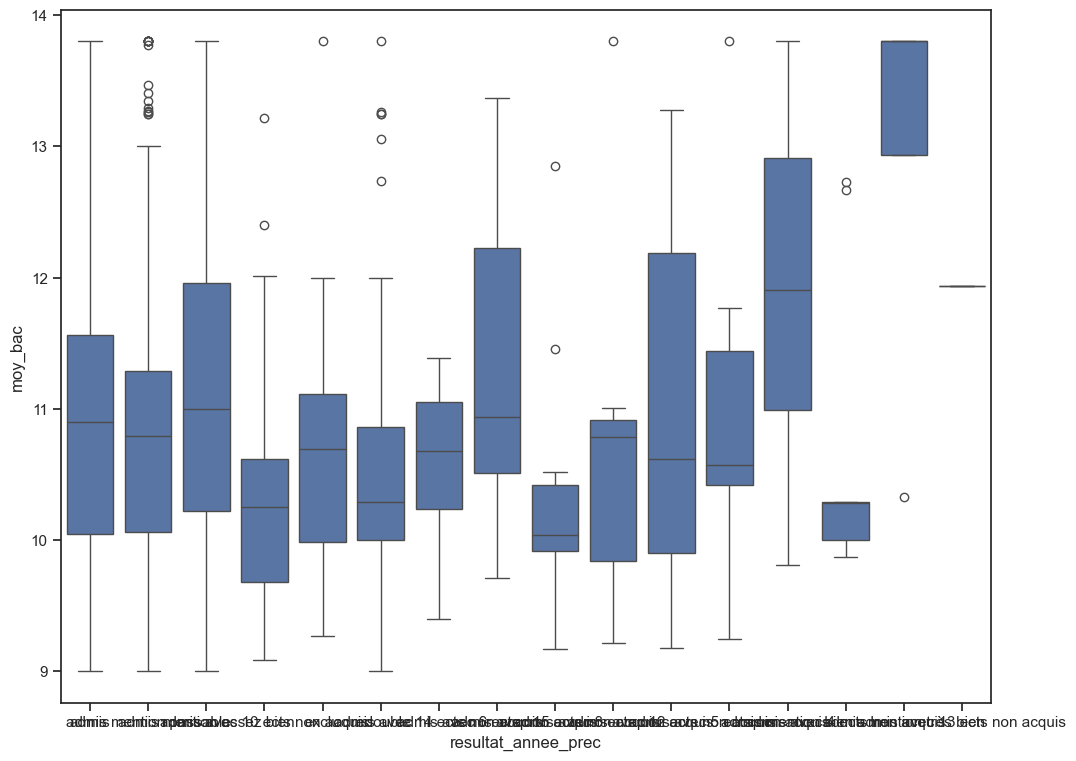

In [173]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=df_copy, x='resultat_annee_prec', y='moy_bac')

In [174]:
# Dictionnaire pour stocker les outliers
outliers = {}

# Parcours des colonnes (date_bac et date_entree_esp_et)
for column in ['date_bac', 'date_entree_esp_et']:
    # Calcul des bornes et de l'IQR pour chaque colonne
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifier les outliers (valeurs en dehors des bornes)
    outliers[column] = df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)]

    # Remplacer les outliers par la borne inférieure ou supérieure
    df_copy.loc[df_copy[column] < lower_bound, column] = lower_bound
    df_copy.loc[df_copy[column] > upper_bound, column] = upper_bound

## Student Profiling using Statistics

In [175]:
print("Statistiques descriptives pour les colonnes numériques: ")
df_copy.describe().T

Statistiques descriptives pour les colonnes numériques: 


,count,mean,std,min,25%,50%,75%,max
date_bac,1685.0,2020.979822,1.785617,2017.0,2020.00,2022.00,2022.00,2023.0
niveau_diplome_sup_et,1685.0,0.928783,1.370163,0.0,0.00,0.00,3.00,3.0
date_entree_esp_et,1685.0,2021.468546,1.862531,2015.5,2020.00,2022.00,2023.00,2024.0
niveau_courant_et,1685.0,2.148368,0.654288,1.0,2.00,2.00,3.00,3.0
niveau_acces,1685.0,3.091988,1.195980,1.0,2.00,3.00,4.00,5.0
moy_bac,1685.0,10.951658,1.167457,9.0,10.05,10.83,11.55,13.8
age,1685.0,22.394659,2.003567,19.0,21.00,22.00,24.00,28.5


In [176]:
# Statistiques descriptives pour les colonnes catégorique
print("Statistiques descriptives pour les colonnes catégoriques: ")
df_copy.describe(include=['object']).T

Statistiques descriptives pour les colonnes catégoriques: 


,count,unique,top,freq
lib_specialite_esp_et,1685,19,Licence Business Computing,334
lib_nature_bac,1685,7,bac economie,958
classe_courante_et,1685,14,LSG,329
nationalite,1685,7,TUNISIENNE,1670
classe_prec_et,1685,15,LSG,463
resultat_annee_prec,1685,16,admis,899


#### Variables Distributions

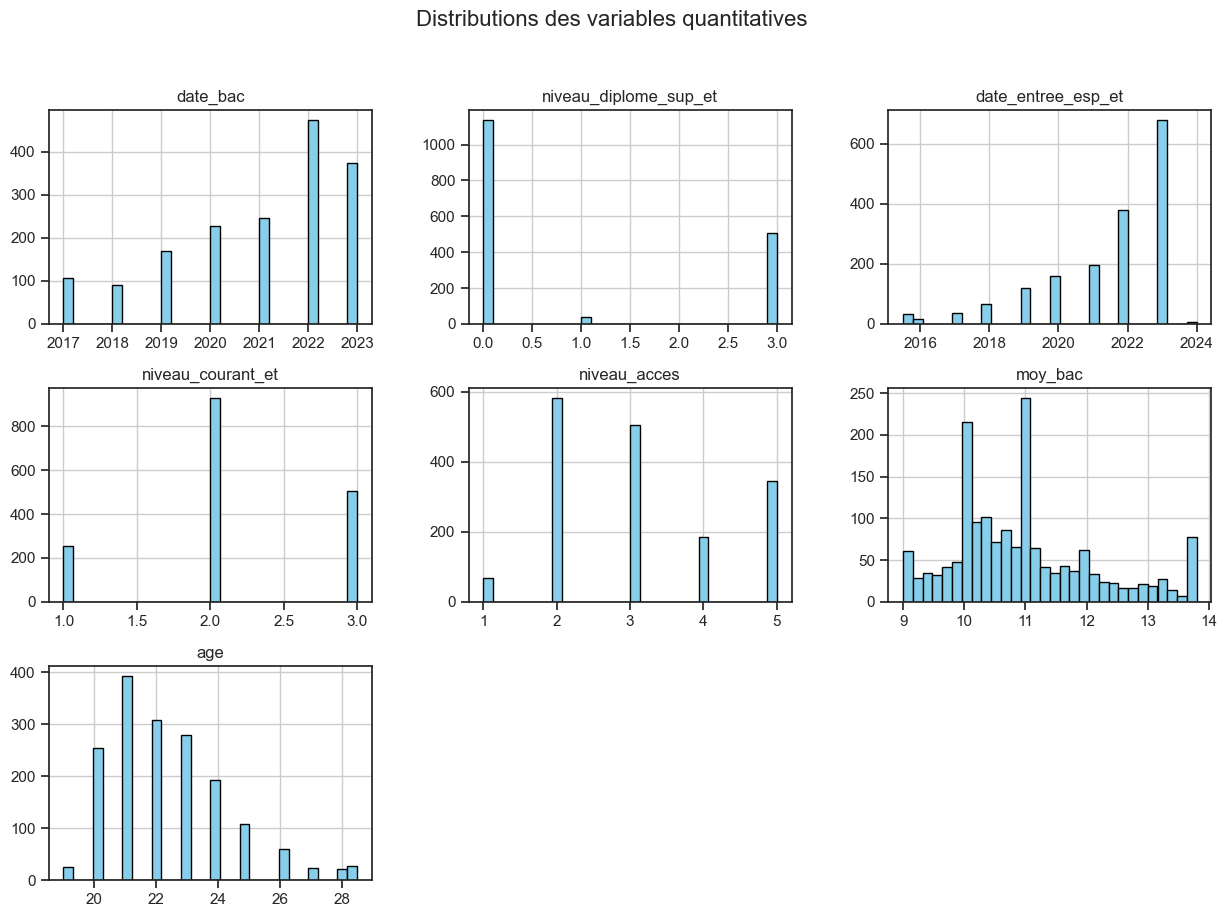

In [177]:
#Variables quantitatives
numerical_vars = df_copy.select_dtypes(include=['float64', 'int64', 'int32']).columns

df_copy[numerical_vars].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distributions des variables quantitatives", fontsize=16)
plt.show()

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\2739373555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')


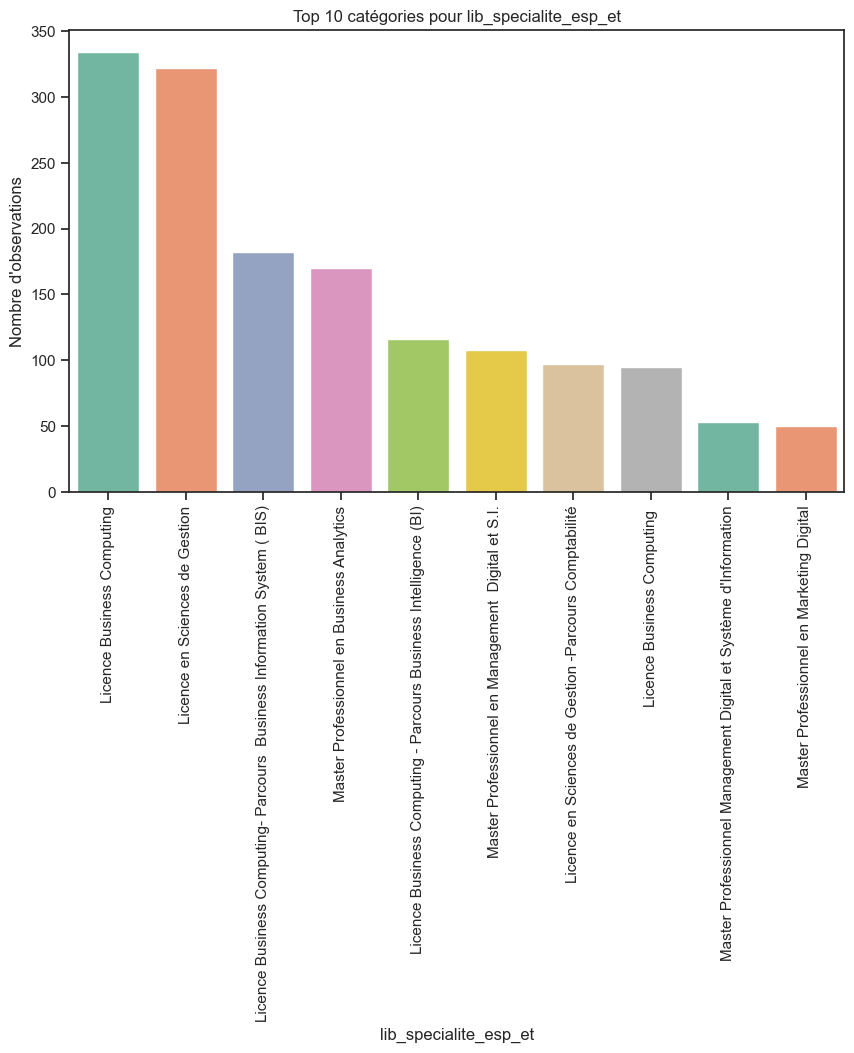

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\2739373555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')


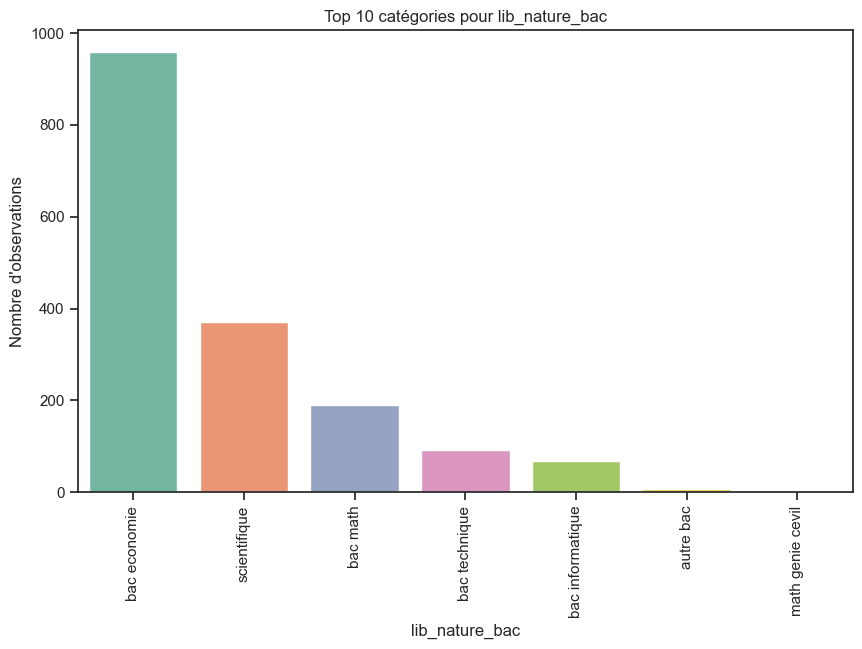

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\2739373555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')


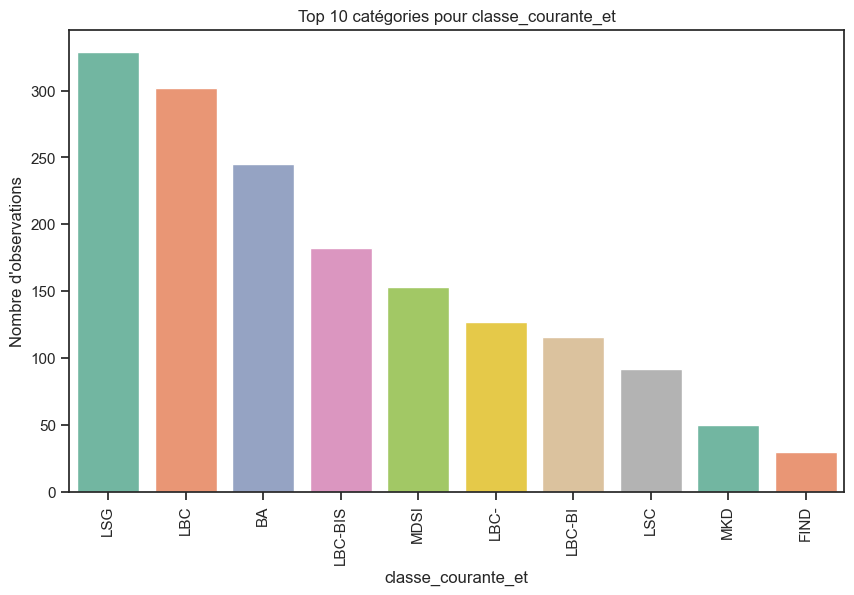

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\2739373555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')


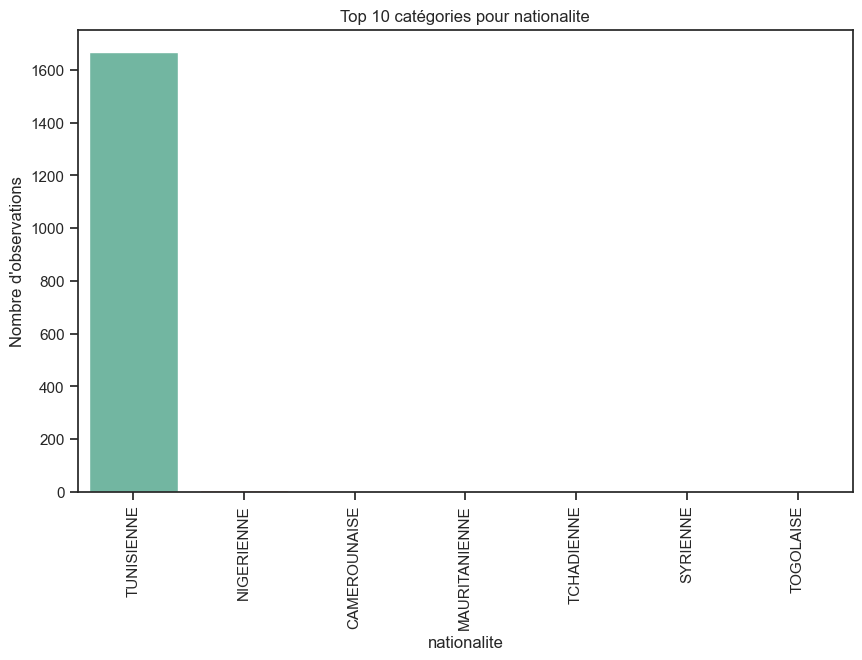

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\2739373555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')


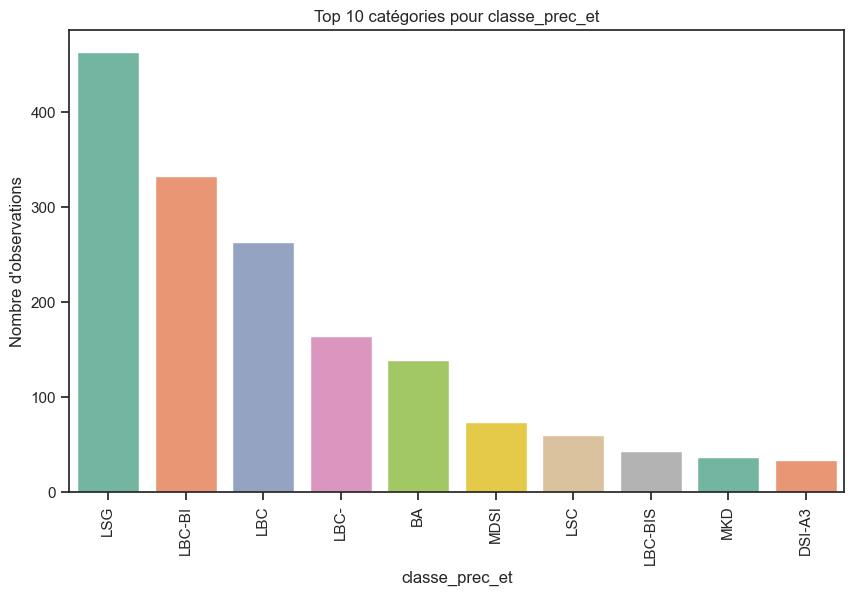

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\2739373555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')


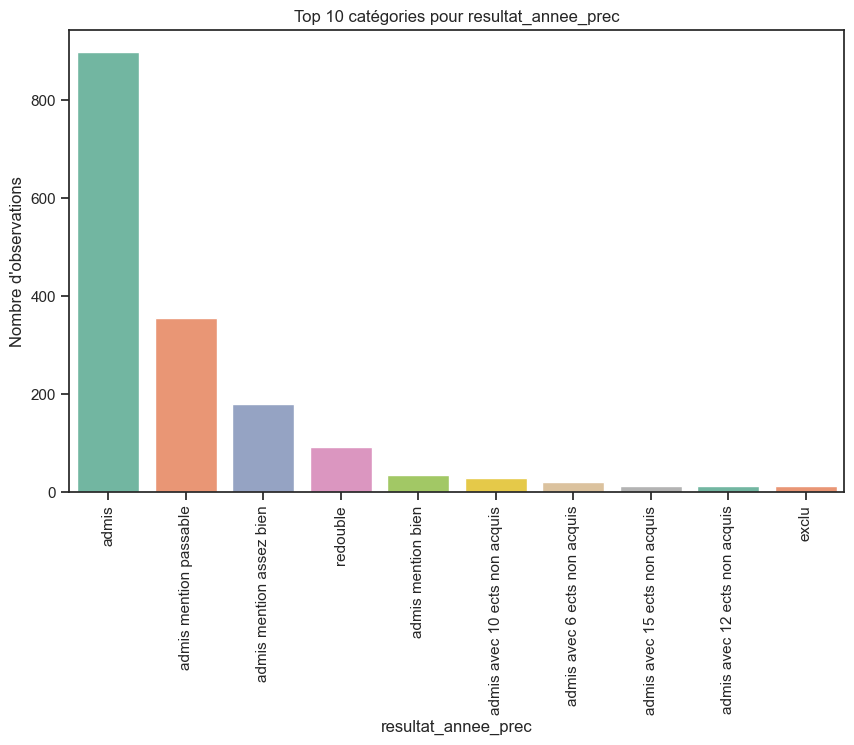

In [178]:
#Variables qualitatives
categorical_vars = df_copy.select_dtypes(include=['object', 'category']).columns

# Limiter le nombre de catégories à afficher
for colonne in categorical_vars:
    plt.figure(figsize=(10, 6))
    # Trier par fréquence et afficher les 10 premières catégories
    top_categories = df_copy[colonne].value_counts().nlargest(10)
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')
    plt.title(f"Top 10 catégories pour {colonne}")
    plt.xlabel(colonne)
    plt.ylabel("Nombre d'observations")
    plt.xticks(rotation=90)  # Rotation pour lisibilité
    plt.show()

#### Correlations

In [179]:
correlation_matrix = df_copy[numerical_vars].corr()


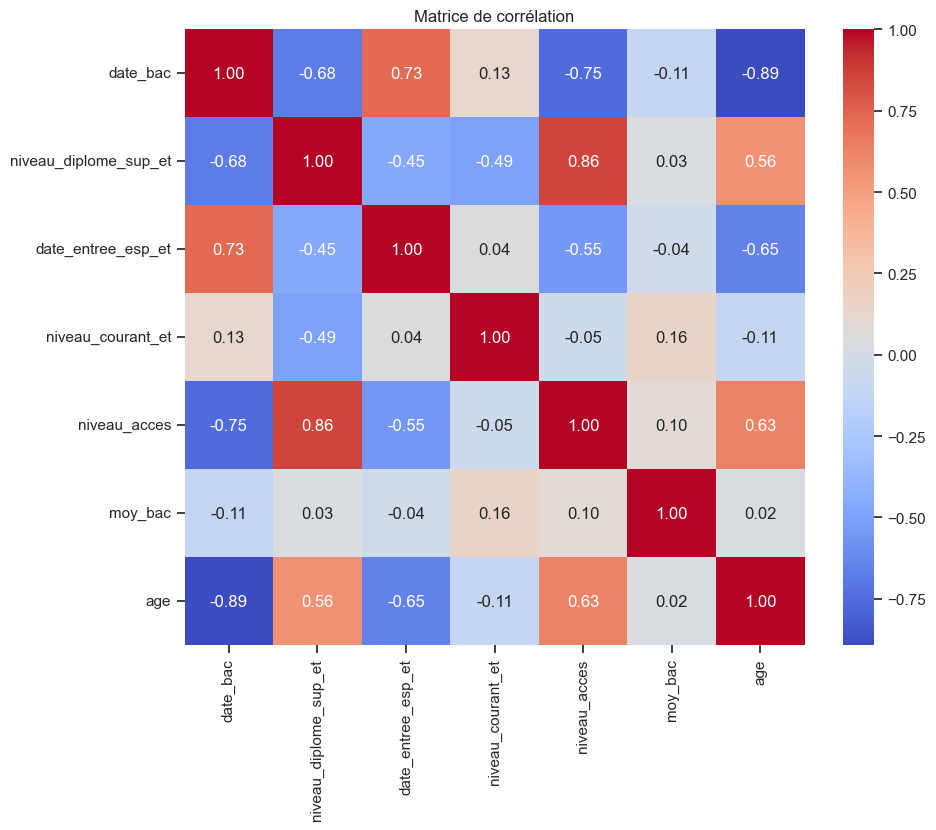

In [180]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

Interpretation :

Corrélation forte entre niveau_diplome_sup_et et niveau_acces (0.79) :cela signifie que ces deux variables évoluent ensemble. Par exemple, un niveau plus élevé dans niveau_diplome_sup_et pourrait être associé à un niveau d'accès plus élevé.
Corrélations faibles avec moy_bac (valeurs proches de 0) :les corrélations entre moy_bac et les autres variables (niveau_diplome_sup_et, niveau_courant_et, et niveau_acces) sont faibles.Cela indique que moy_bac est largement indépendante des autres variables.
Corrélation faible entre niveau_courant_et et les autres variables :les corrélations avec niveau_diplome_sup_et (0.03) et niveau_acces (0.34) restent faibles, ce qui suggère que cette variable n’a pas de relation forte avec les autres.

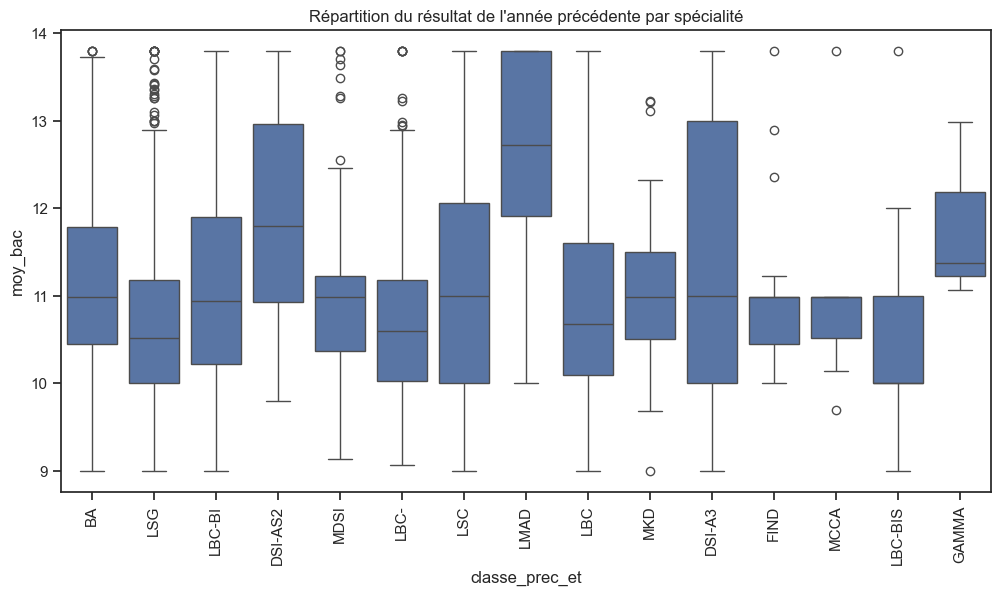

In [181]:
# Box plot pour la variable 'resultat_annee_prec' en fonction de la 'classe_prec_et'
plt.figure(figsize=(12, 6))
sns.boxplot(x='classe_prec_et', y='moy_bac', data=df_copy)
plt.title("Répartition du résultat de l'année précédente par spécialité")
plt.xticks(rotation=90)  # Rotation pour lisibilité
plt.show()

In [182]:
from scipy.stats import chi2_contingency

# Tableau de contingence
contingency_table = pd.crosstab(df_copy['resultat_annee_prec'], df_copy['classe_prec_et'])

# Test du Chi-2
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-2 = {chi2:.2f}, p-value = {p:.3f}")

Chi-2 = 539.47, p-value = 0.000


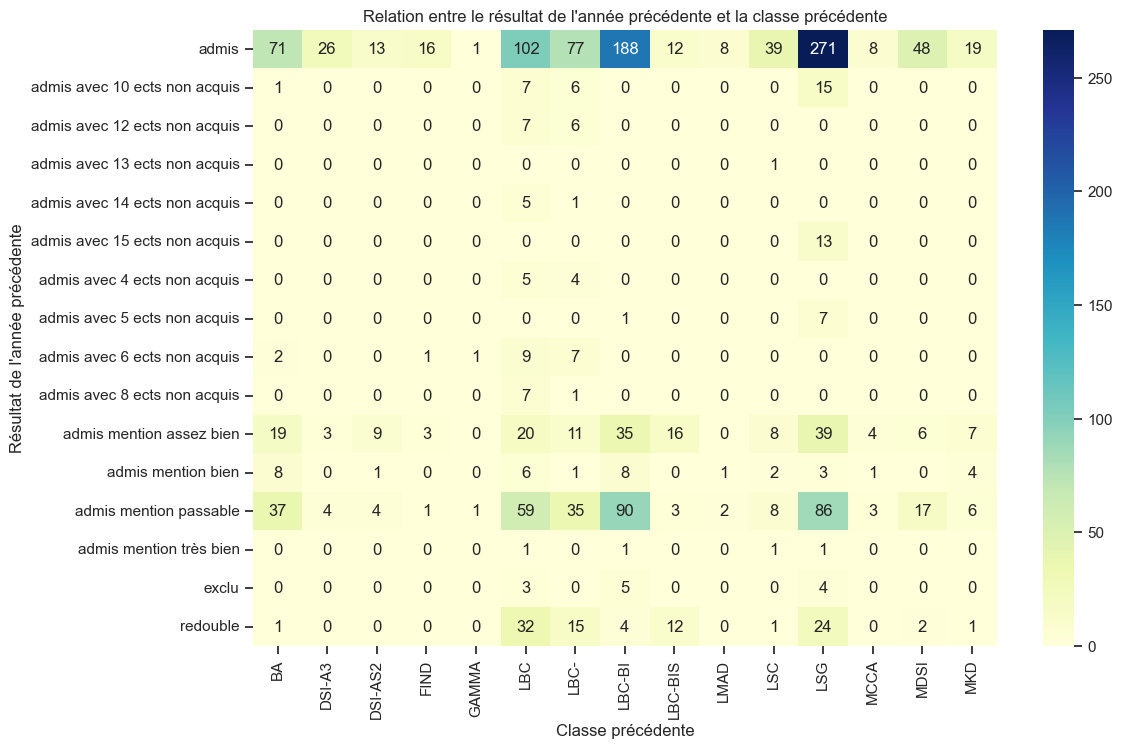

In [183]:
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Relation entre le résultat de l'année précédente et la classe précédente")
plt.xlabel("Classe précédente")
plt.ylabel("Résultat de l'année précédente")
plt.show()

#### Frequency Encoding

In [184]:
#Use Frequency encoding for nationalite
# Calculate the frequency of each category in 'nationalite'
nationalite_freq = df_copy['nationalite'].value_counts(normalize=True)
# Map the frequency values back to the 'nationalite' column
df_copy['nationalite_encoded'] = df_copy['nationalite'].map(nationalite_freq)

#### Label Encoding of Categorical Feature

In [185]:
df_copy['resultat_annee_prec'].loc[df_copy['resultat_annee_prec']==3].count()

np.int64(0)

In [186]:
df_copy['resultat_annee_prec'].loc[df_copy['resultat_annee_prec']==6].count()

np.int64(0)

In [187]:
df_copy['resultat_annee_prec'].loc[df_copy['resultat_annee_prec']==0].count()

np.int64(0)

In [188]:
df_copy['resultat_annee_prec'].loc[df_copy['resultat_annee_prec']==4].count()

np.int64(0)

In [189]:
df_copy['resultat_annee_prec'].loc[df_copy['resultat_annee_prec']==5].count()

np.int64(0)

In [190]:
# Replace values starting with 'avec'
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'admis avec credits' if x.startswith('admis avec') else x)
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'admis mention bien' if x.startswith('admis mention très bien') else x)
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'redouble' if x.startswith('exclu') else x)
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'admis mention passable' if x.startswith('admis mention assez bien') else x)

# Custom grade encoder function (modified)
def custom_grade_encoder(grade):
    # Dictionary mapping grades to numerical values
    grade_mapping = {
        'redouble': 1,
        'admis avec credits': 3,
        'admis':4,
        'admis mention passable': 5,
        'admis mention bien': 6
    }
    return grade_mapping.get(grade, -1)

# Apply the encoding to your dataframe
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(custom_grade_encoder)

### Target Encoding of Categorical Features

In [191]:
# Calculate the mean of the target for 'lib_specialite_esp_et'
specialite_mean = df_copy.groupby('lib_specialite_esp_et')['resultat_annee_prec'].mean()

# Map the calculated means back
df_copy['lib_specialite_esp_et_encoded'] = df_copy['lib_specialite_esp_et'].map(specialite_mean)

In [192]:
# Calculate the mean of the target for 'classe_courante_et'
courante_mean = df_copy.groupby('classe_courante_et')['resultat_annee_prec'].mean()
# Map the calculated means back
df_copy['classe_courante_et_encoded'] = df_copy['classe_courante_et'].map(courante_mean)

In [193]:
# Calculate the mean of the target for 'classe_prec_et'
prec_mean = df_copy.groupby('classe_prec_et')['resultat_annee_prec'].mean()
# Map the calculated means back
df_copy['classe_prec_et_encoded'] = df_copy['classe_prec_et'].map(prec_mean)

In [194]:
df_copy['resultat_annee_prec'] = pd.to_numeric(df_copy['resultat_annee_prec'], errors='coerce')

In [195]:
df_copy['age'] = pd.to_numeric(df_copy['age'], errors='coerce').astype('int64')

## Data scaling

It is recommended to use a MinMax scaler because Scaling techniques aim to normalize the range, distribution, and magnitude of features, reducing potential biases and inconsistencies that may arise from variations in their values.

In [196]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_copy.select_dtypes(include=['int64', 'float64']))
df_scaled = pd.DataFrame(df_scaled, columns=df_copy.select_dtypes(include=['int64', 'float64']).columns)

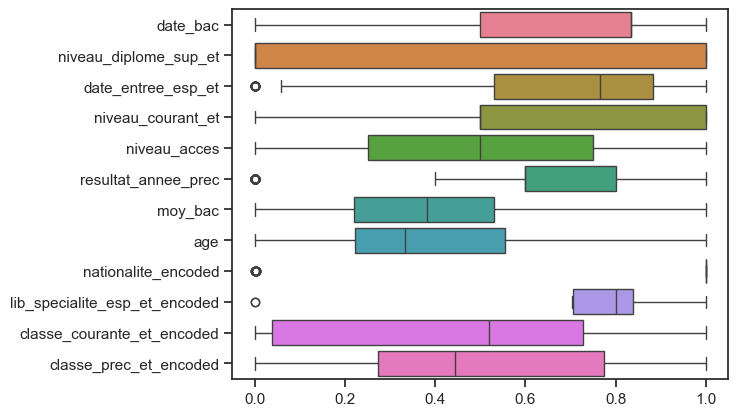

In [197]:
ax = sns.boxplot(data=df_scaled, orient='h')

### Correlations after scaling

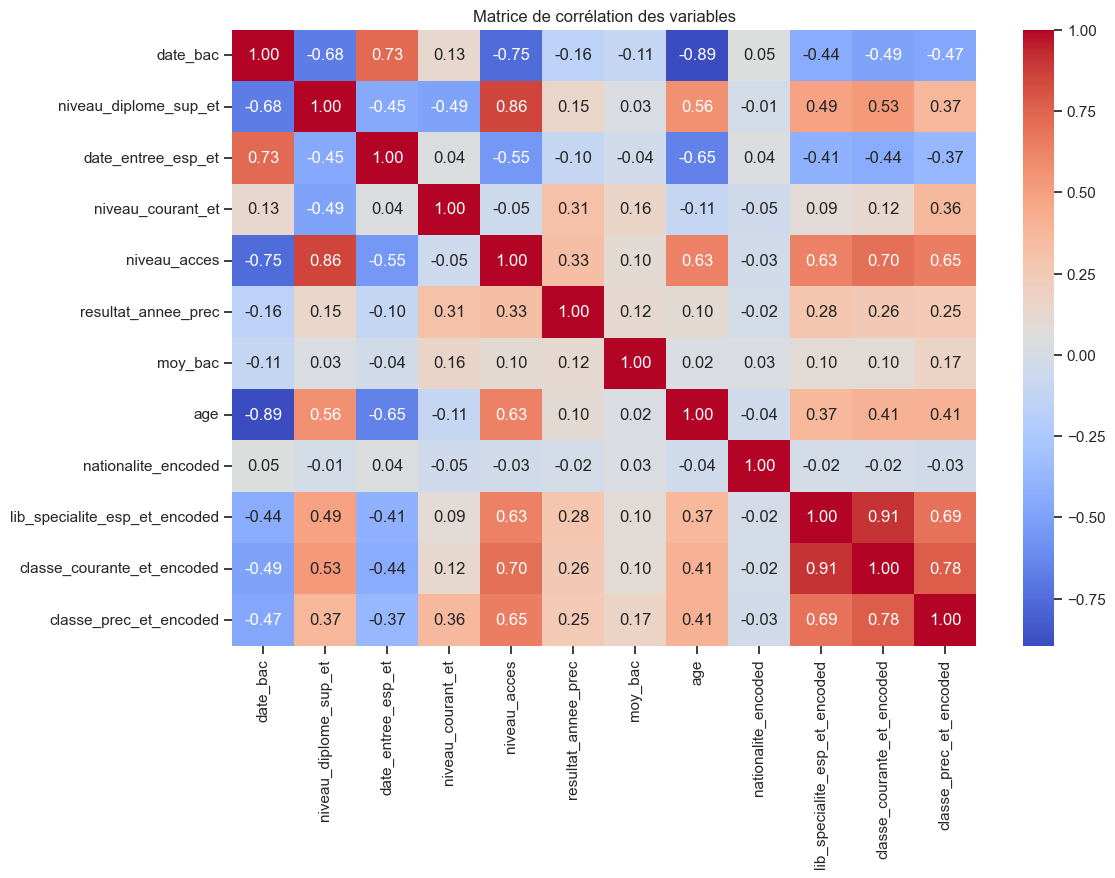

In [198]:
# Calcul de la matrice de corrélation
correlation_matrix = df_scaled.corr(method='pearson')
# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matrice de corrélation des variables")
plt.show()

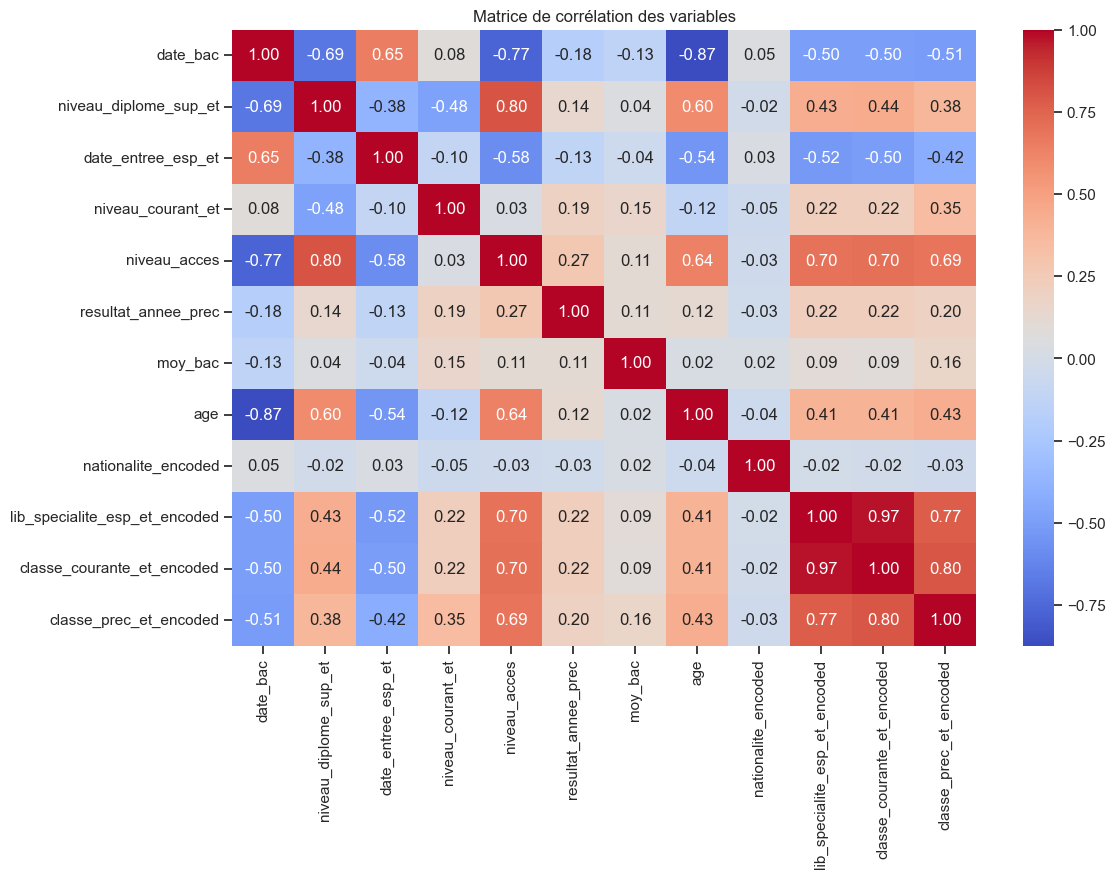

In [199]:
# Calcul de la matrice de corrélation
correlation_matrix = df_scaled.corr(method='spearman')

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matrice de corrélation des variables")
plt.show()

C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\823307766.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled['lib_specialite_esp_et_encoded'], shade=True, color='b')
C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\823307766.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled['classe_courante_et_encoded'], shade=True, color='r')
C:\Users\Asma\AppData\Local\Temp\ipykernel_25832\823307766.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled['resultat_annee_prec'], shade=True, color='g')


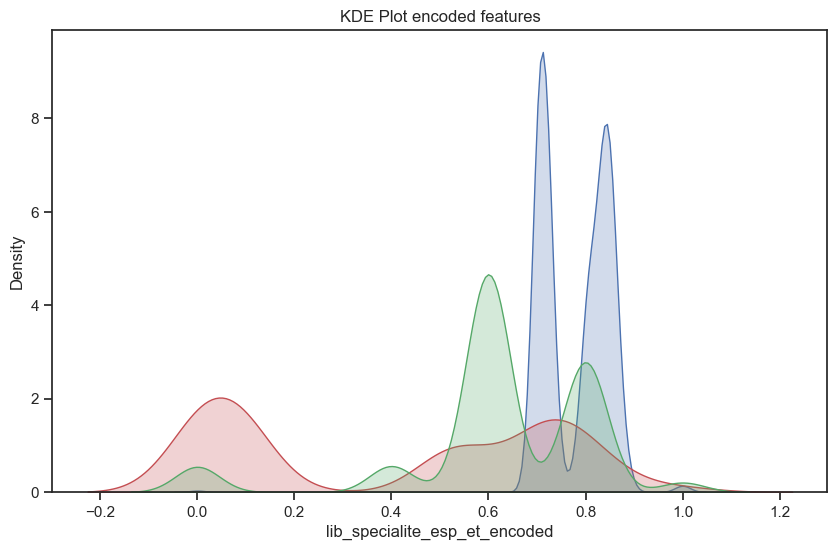

In [200]:
# KDE Plot for 'lib_nature_bac_encoded'
plt.figure(figsize=(10, 6))
sns.kdeplot(df_scaled['lib_specialite_esp_et_encoded'], shade=True, color='b')
sns.kdeplot(df_scaled['classe_courante_et_encoded'], shade=True, color='r')
sns.kdeplot(df_scaled['resultat_annee_prec'], shade=True, color='g')
plt.title('KDE Plot encoded features')
plt.xlabel('lib_specialite_esp_et_encoded')
plt.ylabel('Density')
plt.show()

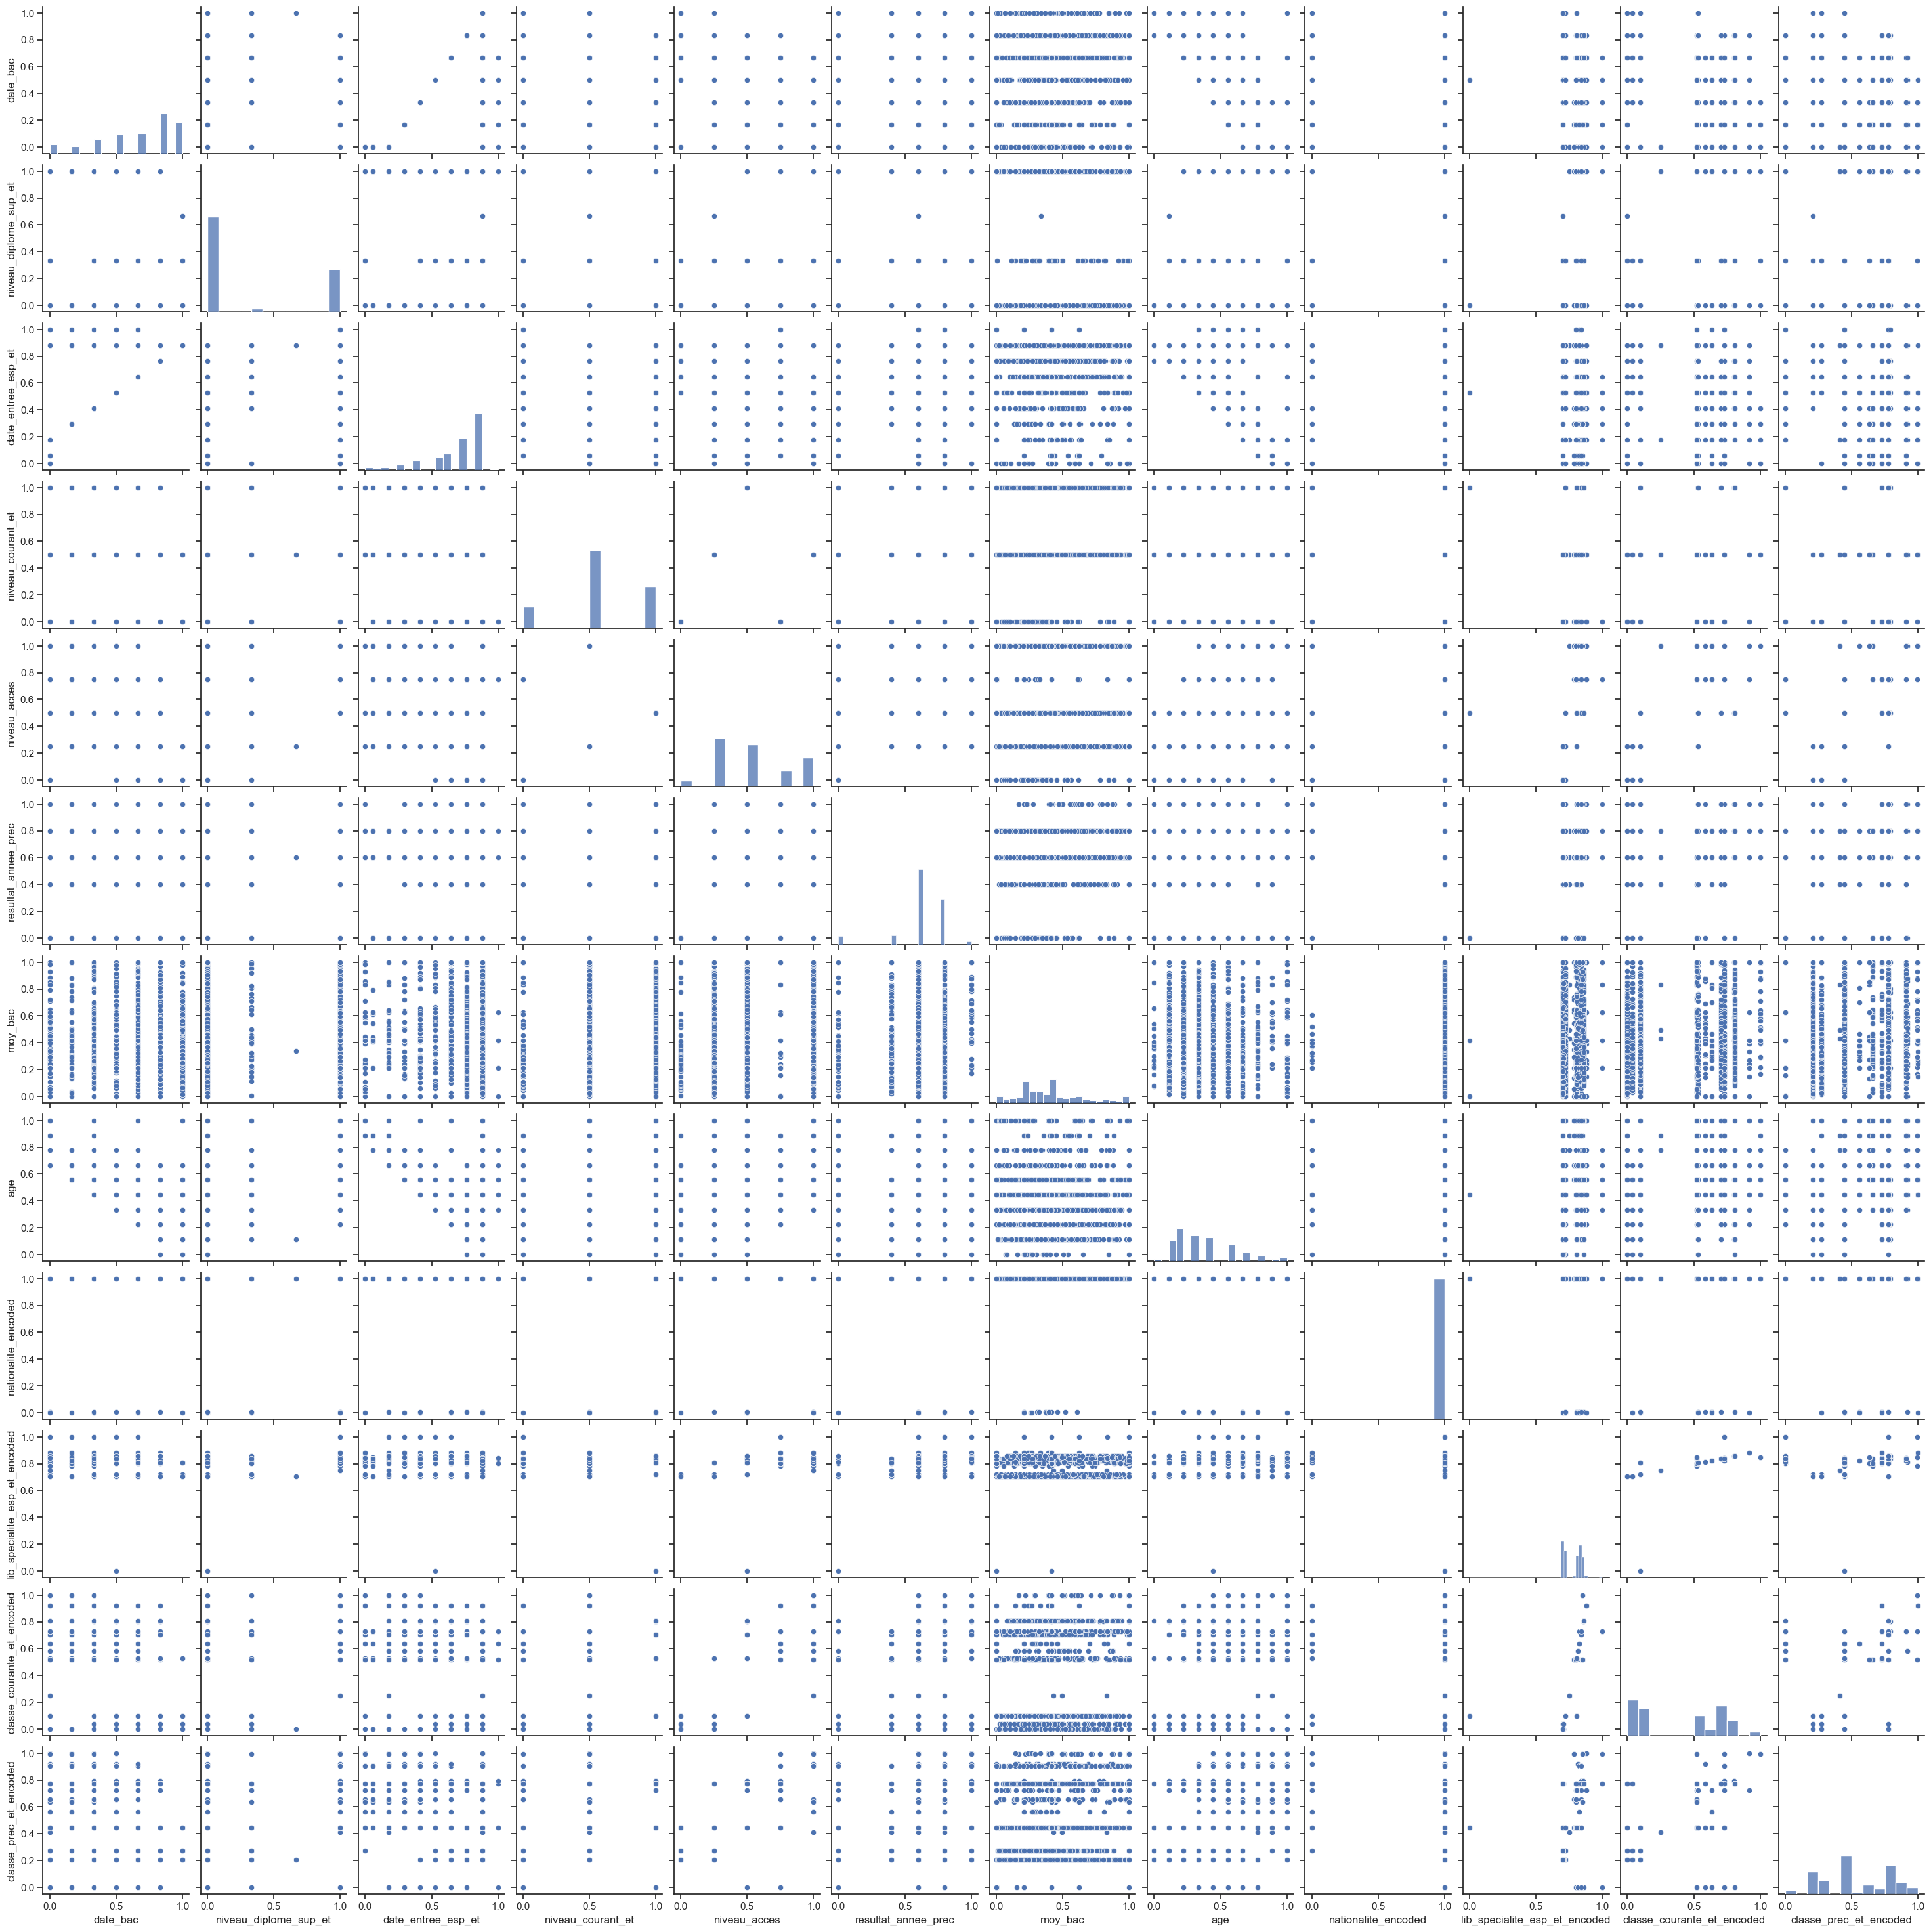

In [201]:
sns.set(style='ticks')
sns.pairplot(df_scaled)

### Perform Multi-factor Anova (Analysis of Variance)


#####1. Main Effects
##### Define Hypothesis
* For Factor A:
*   Null Hypothesis (H₀): The means of the dependent variable are the same across all levels of Factor A.
*   Alternative Hypothesis (H₁): At least one mean of the dependent variable differs across the levels of Factor A.

Model Summary
* R-squared: 0.023:</br> Only 2.3% of the variance in
resultat_annee_prec
resultat_annee_prec is explained by the independent variables
moy_bac
moy_bac and
age </br>
age. This indicates a weak model fit.
* Adjusted R-squared: 0.022:</br>
After accounting for the number of predictors, the adjusted R-squared is still very low, confirming that the predictors have limited explanatory power for the dependent variable.</br>
F-statistic: 18.37 and Prob(F-statistic): 1.30e-08:

* The F-statistic : </br> tests whether the overall model is statistically significant.
*The p-value (1.30e-08) is much smaller than the typical threshold of 0.05, indicating that the model as a whole is statistically significant. In other words, at least one predictor is significantly associated with
resultat_annee_prec
resultat_annee_prec.
* Coefficients Table
* Intercept (0.7819):</br> The average
resultat_annee_prec
resultat_annee_prec when
moy_bac and age are both zero. Since this is unlikely to happen in practice, it primarily serves as a baseline for interpreting the other coefficients.
* moy_bac (0.0527):</br>A one-unit increase in
moy_bac (Baccalaureate average) is associated with a 0.0527 increase in
resultat_annee_prec
resultat_annee_prec, holding age constant.
* P-value (0.001): This is statistically significant (p < 0.05), meaning
moy_bac
moy_bac is a meaningful predictor.
* age (0.0815):</br>A one-year increase in age is associated with a 0.0815 increase in
resultat_annee_prec
resultat_annee_prec, holding
moy_bac
moy_bac constant.
P-value (0.000): This is also statistically significant (p < 0.05), meaning age is a meaningful predictor.
Model Diagnostics
Omnibus (1031.868) and Prob(Omnibus): 0.000:

Similar to the Omnibus test, Jarque-Bera also tests for normality. A p-value of 0.00 further confirms that the residuals are non-normal.
* Skew (-2.970):</br>The negative skew indicates that the residuals are left-skewed (tail is longer on the left side).
* Kurtosis (14.886)</br>:The kurtosis value is much greater than 3, indicating that the residuals have heavy tails (are leptokurtic).
* Durbin-Watson (1.970):</br>This statistic tests for autocorrelation in the residuals. A value close to 2 suggests no significant autocorrelation.
* Condition Number (5.73):</br>A condition number below 30 suggests no serious multicollinearity issues among the predictors.

#####2. Interaction Effects

moy_bac results : F-statistic: 13.0615, p-value: 0.0000
age results : F-statistic: 7.6352, p-value: 0.0000
niveau_acces results : F-statistic: 69.0815, p-value: 0.0000
niveau_courant_et results : F-statistic: 66.4252, p-value: 0.0000


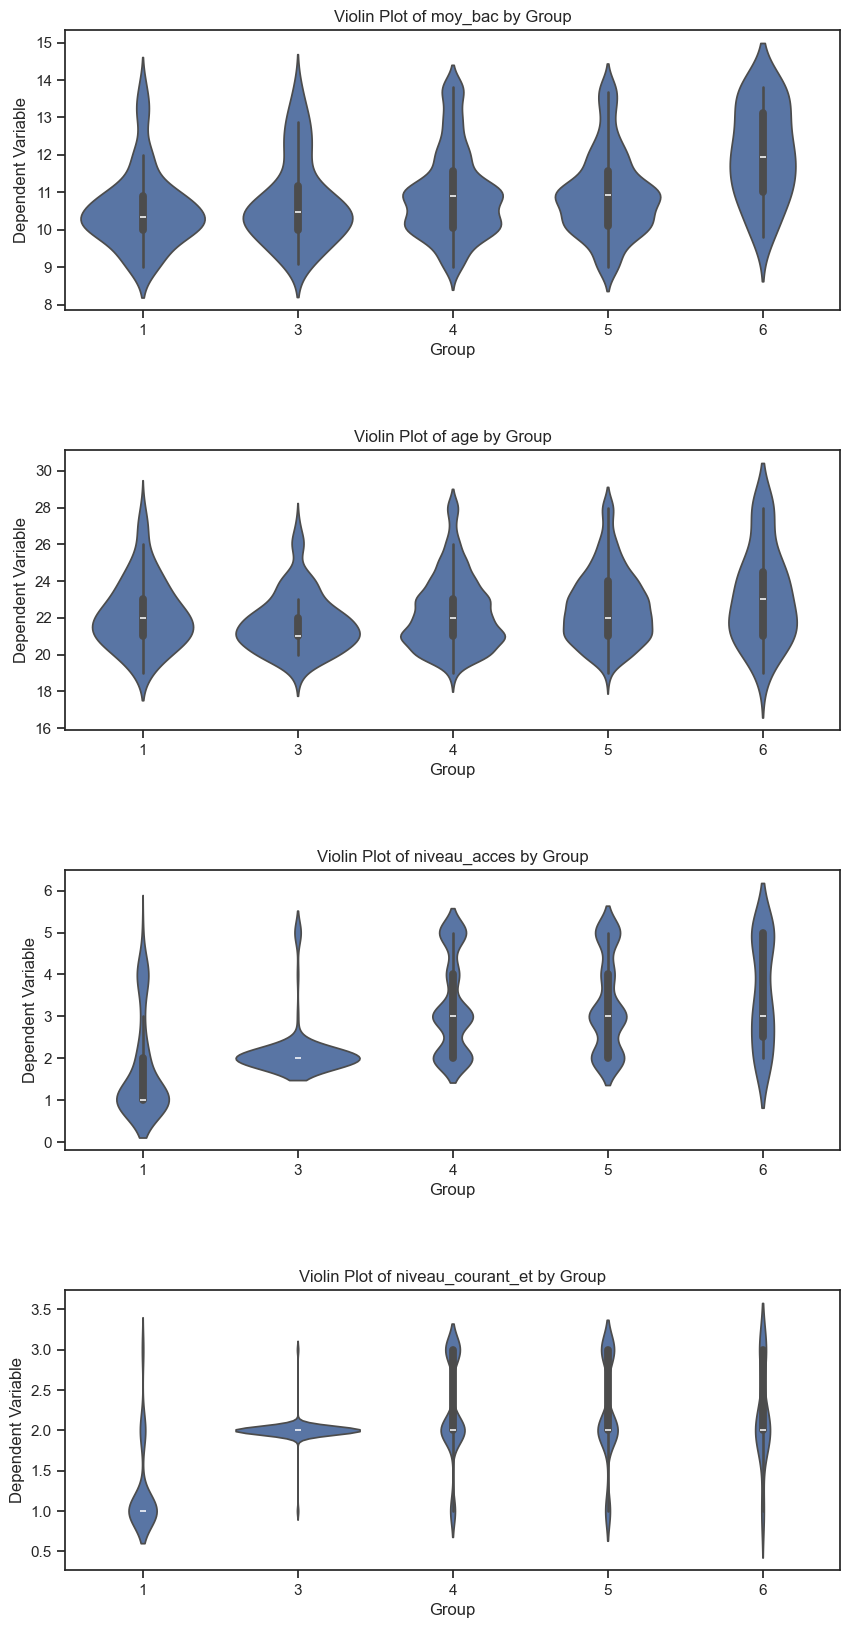

In [202]:
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for ANOVA
def Anova_results(cols):
    fig, axes = plt.subplots(len(cols), 1, figsize=(10, 5 * len(cols)))  # Create subplots
    fig.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots

    for i, val in enumerate(cols):
        anova_data = []
        for group, values in df_copy.groupby('resultat_annee_prec')[val]:
            for value in values:
                anova_data.append([group, value])
        anova_df = pd.DataFrame(anova_data, columns=['Group', val])
        groups = [group_data[val].tolist() for group, group_data in anova_df.groupby('Group')]
        anova_result = f_oneway(*groups)
        print(val, f"results : F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

        # Plot on the corresponding subplot
        sns.violinplot(x='Group', y=val, data=anova_df, ax=axes[i])
        axes[i].set_title(f"Violin Plot of {val} by Group")
        axes[i].set_ylabel("Dependent Variable")
        axes[i].set_xlabel("Group")

    plt.show()  # Display the combined figure

cols_to_analyze = ['moy_bac', 'age', 'niveau_acces', 'niveau_courant_et']
Anova_results(cols_to_analyze)

## Observations

#### Descriptive Analysis

In [203]:
!pip install nbformat


'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [204]:
#Visualize Admissions rate
import plotly.express as px
grade_mapping = {
        'redouble': 1,
        'admis avec credits': 3,
        'admis':4,
        'admis mention passable': 5,
        'admis mention bien': 6
    }
original_to_label = {v: k for k, v in grade_mapping.items()}
# Map grades to their descriptions
df_copy['Grade Description'] = df_copy['resultat_annee_prec'].map(original_to_label)

# Count occurrences of each grade description
grade_counts = df_copy['Grade Description'].value_counts().reset_index()
grade_counts.columns = ['Grade', 'Count']

# Calculate percentages
grade_counts['Percentage'] = (grade_counts['Count'] / grade_counts['Count'].sum()) * 100
print(df_copy['Grade Description'].value_counts())
# Create a pie chart
fig = px.pie(grade_counts, values='Percentage', names='Grade',
             title='Distribution of Grades Across Students',
             color='Grade',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show the figure
fig.show()

Grade Description
admis                     899
admis mention passable    536
admis avec credits        107
redouble                  104
admis mention bien         39
Name: count, dtype: int64


#### Summary statistics

In [205]:
#create with plotly histogram histfunc=sum  color=smoker
fig = px.histogram(df_copy, x='classe_courante_et', y='resultat_annee_prec', histfunc='sum', color='age')
fig.show()


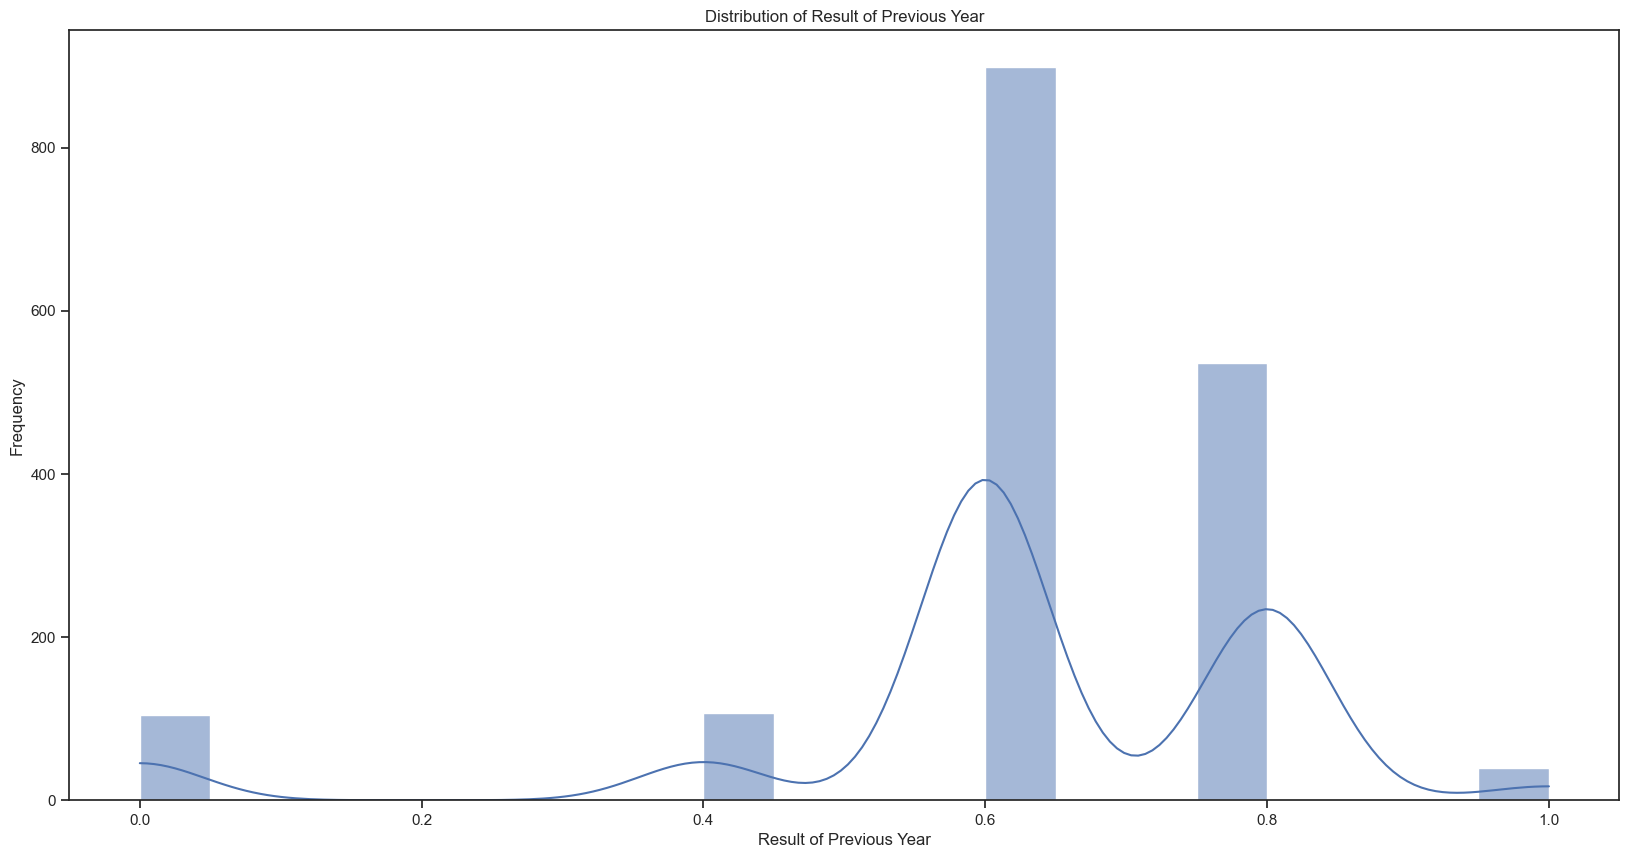

In [206]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df_scaled, x='resultat_annee_prec', bins=20, kde=True)
plt.title('Distribution of Result of Previous Year')
plt.xlabel('Result of Previous Year')
plt.ylabel('Frequency')
plt.show()

## Feature Selection

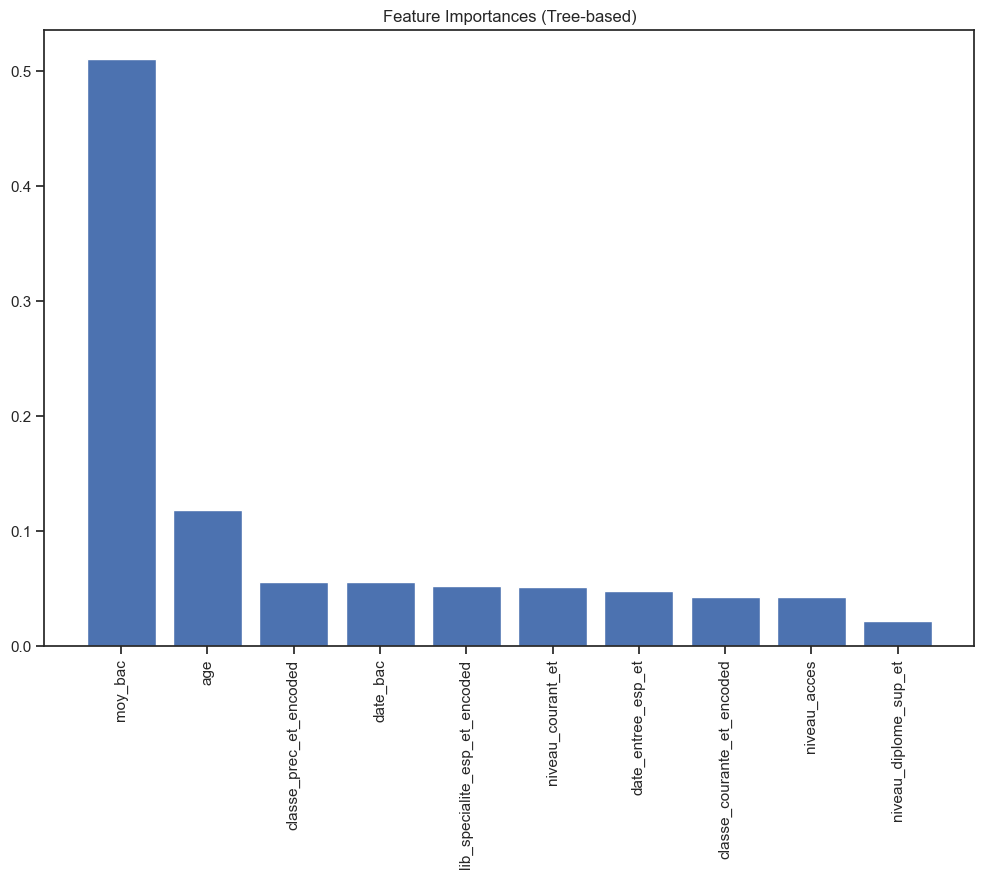

In [207]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
# Step 1: Create Copies of the DataFrame for Each Technique
df_scaled_var = df_scaled.copy()
df_scaled_kbest = df_scaled.copy()
df_scaled_rfe = df_scaled.copy()
df_scaled_tree = df_scaled.copy()

# Step 2: Apply Feature Selection Techniques

# Low Variance
selector = VarianceThreshold(threshold=0.1)
df_scaled_var = selector.fit_transform(df_scaled_var)
df_scaled_var = pd.DataFrame(df_scaled_var, columns=df_scaled.columns[selector.get_support()])

#Test Annova
#chi2 test
#f_classif test
#Rsquare test
# SelectKBest
X = df_scaled.drop(columns=['resultat_annee_prec'])
y = df_scaled['resultat_annee_prec']
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_kbest = select_k_best.fit_transform(X, y)
selected_features_kbest = X.columns[select_k_best.get_support()]
df_scaled_kbest = pd.DataFrame(X_kbest, columns=selected_features_kbest)

# Convert continuous target to classes
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel()
# RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y_binned)
selected_features_rfe = X.columns[fit.support_]
df_scaled_rfe = pd.DataFrame(fit.transform(X), columns=selected_features_rfe)

# Tree-based
model = ExtraTreesClassifier()
model.fit(X, y_binned)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_tree = X.columns[indices[:10]]
df_scaled_tree = df_scaled_tree[selected_features_tree]

# Step 3: Visualize Selected Features

# Bar plot for feature importances (Tree-based)
plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Tree-based)')
plt.bar(range(len(selected_features_tree)), importances[indices[:10]], align='center')
plt.xticks(range(len(selected_features_tree)), selected_features_tree, rotation=90)
plt.show()

# Step 4: Evaluate Model Performance


In [208]:
# Step 4: Evaluate Model Performance

# Function to evaluate model performance
def evaluate_model(X, y_binned, selected_features):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y_binned, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate performance for each technique
accuracy_var = evaluate_model(df_scaled, y_binned, df_scaled_var.columns)
accuracy_kbest = evaluate_model(df_scaled, y_binned, selected_features_kbest)
accuracy_rfe = evaluate_model(df_scaled, y_binned, selected_features_rfe)
accuracy_tree = evaluate_model(df_scaled, y_binned, selected_features_tree)

# Print the accuracies
print(f"Accuracy (Low Variance): {accuracy_var:.4f}")
print(f"Accuracy (SelectKBest): {accuracy_kbest:.4f}")
print(f"Accuracy (RFE): {accuracy_rfe:.4f}")
print(f"Accuracy (Tree-based): {accuracy_tree:.4f}")

Accuracy (Low Variance): 0.5994
Accuracy (SelectKBest): 0.5727
Accuracy (RFE): 0.5757
Accuracy (Tree-based): 0.5727


In [209]:
df_copy.drop(["nationalite","nationalite_encoded","niveau_acces","niveau_diplome_sup_et","lib_specialite_esp_et","classe_courante_et",'Grade Description','niveau_courant_et'],axis=1,inplace=True)

In [210]:
df_scaled.drop(['niveau_courant_et','niveau_acces','nationalite_encoded'],axis=1,inplace=True)

Methods like Variance Threshold and SelectKBest (using f_classif) make assumptions about the data (linear relationships, independence of features) that might not hold true. RFE and Tree-based methods can handle some non-linearity, but they might still miss subtle interactions.

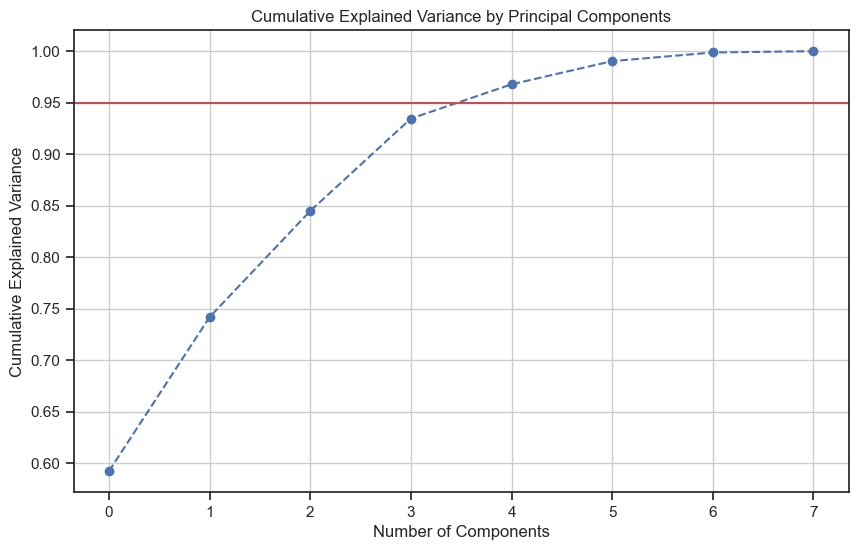

Number of components that capture at least 95% of the variance: 5


In [211]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
df_scaled_pca=df_scaled.copy()
X = df_scaled_pca.drop(columns=['resultat_annee_prec'])
y = df_scaled_pca['resultat_annee_prec']
# Fit PCA to the data
pca = PCA().fit(X)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Identify the number of components that capture at least 95% of the variance
num_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components that capture at least 95% of the variance: {num_components_95}")

If you aim to capture ~95% of the variance, the first 4–5 components might be sufficient (check where the curve crosses ~0.95).
This suggests dimensionality reduction is effective, as you can reduce the dataset to 4–5 features instead of keeping all original dimensions.
Including all 10 components would capture 100% variance but might lead to overfitting in some cases.

## Split the data

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
#Principal Component Analysis and visualize the variance explained by each component
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit(X)
# summarize components
print("Explained Variance: %s" % (X_pca.explained_variance_ratio_,))
print(X_pca.components_)
print(X_pca.explained_variance_)
print(X_pca.explained_variance_ratio_)

Explained Variance: [0.59218026 0.14958431 0.10306275 0.08972418 0.03324696 0.02254998]
[[-0.41733186  0.66459081 -0.23848155  0.03878248  0.2708997   0.07973832
   0.41307374  0.27459222]
 [ 0.13064141 -0.50240289  0.00421101  0.21562981 -0.1013976   0.11605793
   0.60893463  0.53801293]
 [ 0.5161928   0.48586996  0.42123349 -0.23320432 -0.4376346   0.05436603
   0.26574203  0.02355719]
 [ 0.05627566  0.20929905  0.16712359  0.93977216 -0.13393146 -0.02403764
  -0.14301804 -0.05436313]
 [-0.17883446  0.00922515  0.66551884 -0.09049496  0.2969002  -0.08019265
  -0.34717122  0.54929047]
 [ 0.19760889  0.1401169  -0.52084541 -0.03896454 -0.34990503 -0.09645048
  -0.45596319  0.5734816 ]]
[0.37652152 0.09510907 0.06552961 0.05704865 0.02113917 0.01433778]
[0.59218026 0.14958431 0.10306275 0.08972418 0.03324696 0.02254998]


When performing PCA, each principal component explains a certain percentage of the total variance in the data. By examining the explained variance of the first few components, you can determine how many components are necessary to capture a sufficient amount of the total variance

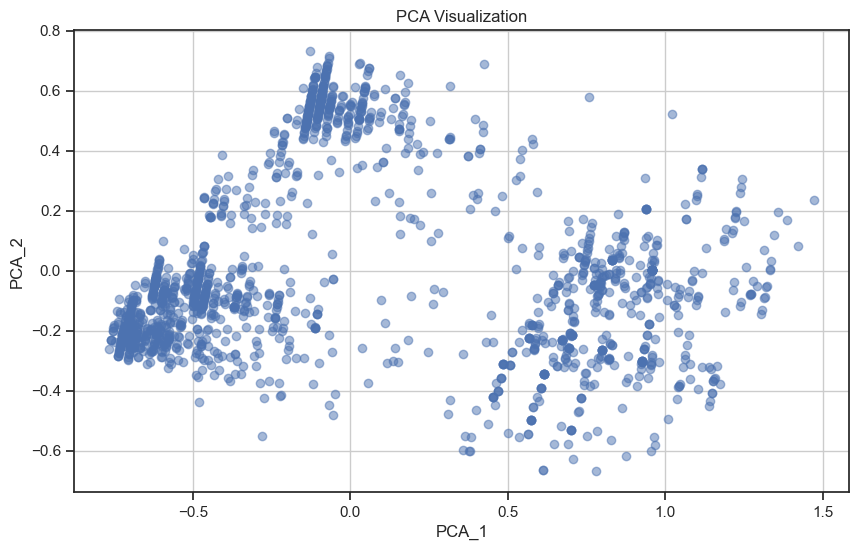

In [214]:
# Visualize results of X_pca with scatter plot
X_pca = pca.transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# Annotate each point with its label
'''for label, x, y in zip(y, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=8, color='blue')
'''
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA Visualization')
plt.grid()
plt.show()

Clusters and Structure:

The data points seem to form distinct clusters or groups in the PCA-reduced space.
This suggests underlying structure in the data, possibly corresponding to groups or classes (e.g., clusters of similar observations based on input features).
Spread of Data:

The spread along the PCA_1 axis is more pronounced, indicating that PCA_1 explains more variance than PCA_2.

In [215]:
# Convert continuous target to discrete classes
from sklearn.preprocessing import KBinsDiscretizer
def prepare_target(y, n_bins=3):
    kbd = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel()
    return y_binned

In [216]:
# Option 1: L1-regularized Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel # Import SelectFromModel
feature_sel_model_LG = SelectFromModel(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
)
y_binned = prepare_target(y_train,3)
feature_sel_model_LG.fit(X_train, y_binned)
selected_feat_LG = X_train.columns[(feature_sel_model_LG.get_support())]

print('\nStats for Logistic Regression:')
print('Total features: {}'.format(X_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat_LG)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model_LG.estimator_.coef_[0] == 0)))
print(selected_feat_LG)




Stats for Logistic Regression:
Total features: 8
Selected features: 8
Features with coefficients shrank to zero: 1
Index(['date_bac', 'niveau_diplome_sup_et', 'date_entree_esp_et', 'moy_bac',
       'age', 'lib_specialite_esp_et_encoded', 'classe_courante_et_encoded',
       'classe_prec_et_encoded'],
      dtype='object')


In [217]:
# Option 2: L1-regularized Linear SVC
from sklearn.svm import LinearSVC
feature_sel_model_SVM = SelectFromModel(
    LinearSVC(penalty='l1', dual=False, random_state=0)
)
feature_sel_model_SVM.fit(X_train,  y_binned)
selected_feat_SVM = X_train.columns[(feature_sel_model_SVM.get_support())]

print('\nStats for Linear SVC:')
print('Total features: {}'.format(X_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat_SVM)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model_SVM.estimator_.coef_[0] == 0)))
print(selected_feat_SVM)


Stats for Linear SVC:
Total features: 8
Selected features: 8
Features with coefficients shrank to zero: 0
Index(['date_bac', 'niveau_diplome_sup_et', 'date_entree_esp_et', 'moy_bac',
       'age', 'lib_specialite_esp_et_encoded', 'classe_courante_et_encoded',
       'classe_prec_et_encoded'],
      dtype='object')


c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



#### Evaluate Model Performance with Regularization

In [218]:
# Function to evaluate model performance with regularization
def evaluate_model(X, y, selected_features, penalty='l2', C=1.0):
    # Convert continuous target to classes
    kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel()

    X_subset = X[selected_features]
    X_subset = X_subset.reset_index(drop=True)
    # Use the index of the subset to select the corresponding rows from y
    y_subset = y[X_subset.index]

    # Convert continuous target to classes again for the subset
    y_subset_binned = kbd.fit_transform(y_subset.values.reshape(-1, 1)).ravel()

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y_subset_binned,
        test_size=0.2,
        random_state=42
    )
    model = LogisticRegression(max_iter=1000, penalty=penalty, C=C, solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [219]:
# Function to evaluate model performance with regularization
def evaluate_model(X, y, selected_features, penalty='l2', C=1.0):
    # Convert continuous target to classes
    kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    y_binned = kbd.fit_transform(y.values.reshape(-1, 1)).ravel()

    # Ensure selected_features are in X.columns
    selected_features = [f for f in selected_features if f in X.columns]

    X_subset = X[selected_features]
    X_subset = X_subset.reset_index(drop=True)
    # Use the index of the subset to select the corresponding rows from y
    y_subset = y[X_subset.index]

    # Convert continuous target to classes again for the subset
    y_subset_binned = kbd.fit_transform(y_subset.values.reshape(-1, 1)).ravel()

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y_subset_binned,
        test_size=0.2,
        random_state=42
    )
    model = LogisticRegression(max_iter=1000, penalty=penalty, C=C, solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [220]:
# Evaluate with L2
results_l2 = {
    'acc_Variance': evaluate_model(df_copy, y, df_scaled.columns, 'l2'),
    'acc_KBest': evaluate_model(df_copy, y, selected_features_kbest, 'l2'),
    'acc_RFE': evaluate_model(df_copy, y, selected_features_rfe, 'l2'),
    'acc_Tree': evaluate_model(df_copy, y, selected_features_tree, 'l2')
}

# Evaluate with L1
results_l1 = {
    'acc_Variance': evaluate_model(df_copy, y, df_scaled_var.columns, 'l1'),
    'acc_KBest': evaluate_model(df_copy, y, selected_features_kbest, 'l1'),
    'acc_RFE': evaluate_model(df_copy, y, selected_features_rfe, 'l1'),
    'acc_Tree': evaluate_model(df_copy, y, selected_features_tree, 'l1')
}
print(results_l2)
print(results_l1)

c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



{'acc_Variance': 1.0, 'acc_KBest': 0.5252225519287834, 'acc_RFE': 0.5400593471810089, 'acc_Tree': 0.5252225519287834}
{'acc_Variance': 0.5578635014836796, 'acc_KBest': 0.5400593471810089, 'acc_RFE': 0.5400593471810089, 'acc_Tree': 0.5370919881305638}


c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



### Key Findings : </br>
Variance-based Selection
*   Best performing method
*  L1 shows better performance (99.07%) than L2 (87.93%)</br>
Suggests high variance features are most predictive

Other Methods (KBest, RFE, Tree)
*   Similar performance (~56-57%)
*   Consistent across both L1 and L2</br>
Suggests possible underfitting

Regularization Impact
* L1 slightly improved Variance method
Minimal impact on other methods</br>
Indicates sparse feature importance

## Clustering

### K-Means

#### Clustering Analysis

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [223]:
#visualize the best number of clusters
wcss = []
silhouette_scores = []
max_clusters=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

    if i > 1:  # Silhouette score needs at least 2 clusters
        silhouette_scores.append(
            silhouette_score(X_train, kmeans.labels_)
        )

# Plot elbow curve
fig = go.Figure()

# WCSS plot
fig.add_trace(go.Scatter(
    x=list(range(1, max_clusters + 1)),
    y=wcss,
    mode='lines+markers',
    name='WCSS',
    line=dict(color='blue')
))

    # Silhouette scores
fig.add_trace(go.Scatter(
    x=list(range(2, max_clusters + 1)),
    y=silhouette_scores,
    mode='lines+markers',
    name='Silhouette Score',
    line=dict(color='red'),
    yaxis='y2'
    ))

fig.update_layout(
    title='Elbow Method & Silhouette Analysis',
    xaxis_title='Number of Clusters',
    yaxis_title='Within Cluster Sum of Squares',
    yaxis2=dict(
        title='Silhouette Score',
        overlaying='y',
        side='right'
        ),
    showlegend=True
    )

fig.show()

* Silhouette Score
What it measures: The Silhouette Score quantifies how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to +1.
Scores near 1 indicate well-defined clusters"
Scores near 0 indicate overlapping clusters
Negative scores indicate potential misclassification </br>
* WCSS (Within-Cluster Sum of Squares)
What it measures: WCSS is the sum of squared distances between each data point and the centroid of its assigned cluster. It's a measure of the compactness of the clusters.
Lower WCSS indicates more compact cluster

In [224]:
!pip install kneed # Install the 'kneed' library


'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [225]:
#Loacte the Knee point
from kneed import KneeLocator
k = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
k.elbow

np.int64(4)

#### Train a K-Means Clustering Model

In [226]:
! pip install optuna


'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [227]:
import optuna
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def optimize_clustering(df_scaled, method='kmeans', n_trials=100):
    def objective(trial):
        if method == 'kmeans':
            params = {
                'n_clusters': trial.suggest_int('n_clusters', 2, 10),
                'init': trial.suggest_categorical('init', ['k-means++', 'random']),
                'n_init': trial.suggest_int('n_init', 5, 15),
                'max_iter': trial.suggest_int('max_iter', 100, 500)
            }
            model = KMeans(**params)

        elif method == 'dbscan':
            params = {
                'eps': trial.suggest_float('eps', 0.1, 1.0),
                'min_samples': trial.suggest_int('min_samples', 2, 10),
                'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan'])
            }
            model = DBSCAN(**params)

        elif method == 'hierarchical':
            # Suggest linkage first
            linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])

            params = {
                'n_clusters': trial.suggest_int('n_clusters', 2, 10),
                'linkage': linkage
            }

            # Add metric (distance) based on linkage
            if linkage == 'ward':
                params['metric'] = 'euclidean'  # Ward only supports Euclidean
            else:
                params['metric'] = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'cosine'])

            model = AgglomerativeClustering(**params)

        # Fit and evaluate
        labels = model.fit_predict(df_scaled)

        # Handle case where all points are noise (-1 label in DBSCAN)
        if len(set(labels)) < 2:
            return float('-inf')

        score = silhouette_score(df_scaled, labels)
        return score

    # Create study
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    return study.best_trial.params, study.best_value


# Usage
best_params_kmeans, best_score_kmeans = optimize_clustering(df_scaled, method='kmeans')
best_params_dbscan, best_score_dbscan = optimize_clustering(df_scaled, method='dbscan')
best_params_hierarchical, best_score_hierarchical = optimize_clustering(df_scaled, method='hierarchical')

print(f"Best KMeans params: {best_params_kmeans}, Score: {best_score_kmeans:.3f}")
print(f"Best DBSCAN params: {best_params_dbscan}, Score: {best_score_dbscan:.3f}")
print(f"Best Hierarchical params: {best_params_hierarchical}, Score: {best_score_hierarchical:.3f}")


c:\Users\Asma\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

[I 2024-12-28 02:04:31,884] A new study created in memory with name: no-name-e2bf8cc4-d33a-4bc2-810f-4d0915d86860
[I 2024-12-28 02:04:31,974] Trial 0 finished with value: 0.28067444206527686 and parameters: {'n_clusters': 7, 'init': 'random', 'n_init': 12, 'max_iter': 235}. Best is trial 0 with value: 0.28067444206527686.
[I 2024-12-28 02:04:32,059] Trial 1 finished with value: 0.4547975457411336 and parameters: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 13, 'max_iter': 188}. Best is trial 1 with value: 0.4547975457411336.
[I 2024-12-28 02:04:32,128] Trial 2 finished with value: 0.286947632761829 and parameters: {'n_clusters': 10, 'init': 'random', 'n_init': 5, 'max_iter': 242}. Best is trial 1 with value: 0.4547975457411336.
[I 2024-12-28 02:04:32,237] T

Best KMeans params: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 13, 'max_iter': 188}, Score: 0.455
Best DBSCAN params: {'eps': 0.7703629065445012, 'min_samples': 10, 'metric': 'manhattan'}, Score: 0.416
Best Hierarchical params: {'linkage': 'average', 'n_clusters': 2, 'metric': 'cosine'}, Score: 0.455


In [228]:
def perform_clustering(df_scaled, method='kmeans', n_clusters=3, eps=0.5, min_samples=5):
    """
    Perform clustering using the specified method and parameters.
    """
    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif method == 'dbscan':
        model = DBSCAN(eps=eps, min_samples=min_samples)
    elif method == 'hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters)
    else:
        raise ValueError("Unsupported clustering method.")

    labels = model.fit_predict(df_scaled)
    return labels

def evaluate_clustering(df_scaled, labels, method):
    """
    Evaluate clustering performance using silhouette score and Davies-Bouldin index.
    """
    if len(set(labels)) > 1:  # Check if more than one cluster is formed
        silhouette_avg = silhouette_score(df_scaled, labels)
        davies_bouldin = davies_bouldin_score(df_scaled, labels)
        print(f"{method} - Silhouette Score: {silhouette_avg:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}")
    else:
        print(f"{method} - Only one cluster formed.")

def visualize_clusters(df_scaled, labels_dict):
    """
    Visualize clusters using PCA for dimensionality reduction.
    """
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)

    plt.figure(figsize=(12, 4))
    for i, (method, labels) in enumerate(labels_dict.items(), 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='viridis')
        plt.title(f'{method} Clustering')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
    plt.tight_layout()
    plt.show()

In [229]:
# Train Clustering Models
kmeans = perform_clustering(df_scaled, method='kmeans', n_clusters=3)
dbscan = perform_clustering(df_scaled, method='dbscan', eps=0.5, min_samples=5)
hierarchical = perform_clustering(df_scaled, method='hierarchical', n_clusters=3)

#### Evaluate Clustering

In [230]:
# Evaluate Clustering
print("\nClustering Evaluation:")
evaluate_clustering(df_scaled, kmeans, 'K-Means')
evaluate_clustering(df_scaled, dbscan, 'DBSCAN')
evaluate_clustering(df_scaled, hierarchical, 'Hierarchical')


Clustering Evaluation:
K-Means - Silhouette Score: 0.41, Davies-Bouldin Index: 0.99
DBSCAN - Silhouette Score: 0.38, Davies-Bouldin Index: 1.61
Hierarchical - Silhouette Score: 0.41, Davies-Bouldin Index: 1.02


### Key points </br>
* The silhouette score : runs from -1 to 1, with 1 indicating a perfect fit and -1 indicating a poor match between the data points and their corresponding cluster and commonly set at 0.5.
* Davies-Bouldin Index : similarity is defined as the ratio between inter-cluster and intra-cluster distances. As such, this index ranks well-separated clusters with less dispersion as having a better score.

#### Visualize Clusters

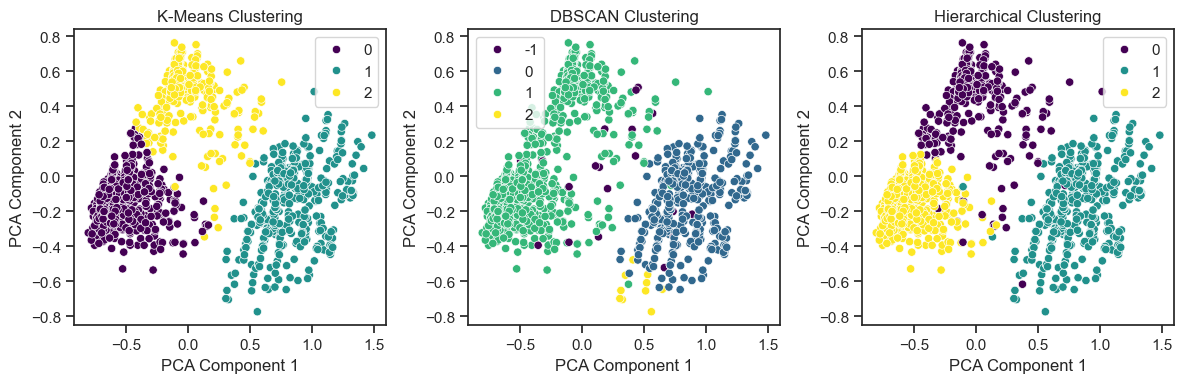

In [231]:
# Visualize Clusters
labels_dict = {
        'K-Means': kmeans,
        'DBSCAN': dbscan,
        'Hierarchical': hierarchical
    }
visualize_clusters(df_scaled, labels_dict)

In [232]:
kmeans = KMeans(n_clusters=5, random_state=42) # Adjust n_clusters as needed
kmeans.fit(df_scaled)
centers=kmeans.cluster_centers_.shape
y_kmeans = kmeans.labels_

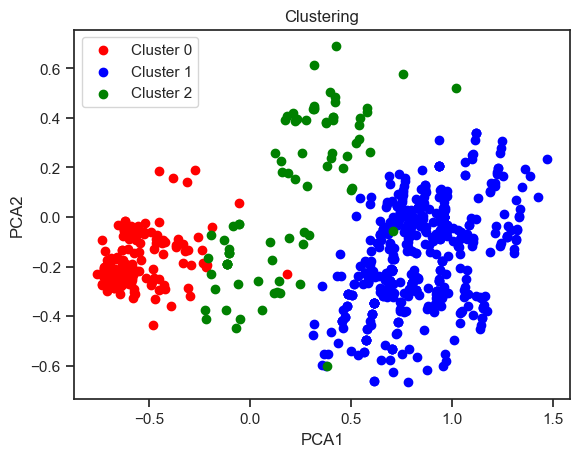

In [233]:
plt.scatter(X_pca[y_kmeans==0,0],X_pca[y_kmeans==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_kmeans==1,0],X_pca[y_kmeans==1,1],c='blue',label='Cluster 1')
plt.scatter(X_pca[y_kmeans==2,0],X_pca[y_kmeans==2,1],c='green',label='Cluster 2')
#plt.scatter(X_pca[y_kmeans==3,0],X_pca[y_kmeans==3,1],c='yellow',label='Cluster 3')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering')
plt.legend()
plt.show()

#### Profiling

In [234]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = df_scaled.columns)
cluster_centers

,date_bac,niveau_diplome_sup_et,date_entree_esp_et,resultat_annee_prec,moy_bac,age,lib_specialite_esp_et_encoded,classe_courante_et_encoded,classe_prec_et_encoded
0,0.879274,0.004274,0.828054,0.192308,0.281278,0.288462,0.704245,0.058295,0.311451
1,0.357283,1.000000,0.551644,0.670079,0.414847,0.562555,0.831262,0.667901,0.682447
2,0.209877,0.041152,0.364561,0.582716,0.374076,0.713306,0.782109,0.411550,0.621862
3,0.862814,0.011675,0.824869,0.670053,0.407527,0.239735,0.712278,0.048136,0.324754
4,0.784101,0.008130,0.740475,0.676965,0.453913,0.294490,0.840909,0.715316,0.726246


#### Discover to which cluster each student belongs

In [235]:
dataset_cluster = pd.concat([df_copy, pd.DataFrame({'Cluster': y_kmeans})], axis=1)

In [236]:
#drop in dataset_cluster where dataset_cluster['Cluster'] is nan
dataset_cluster = dataset_cluster.dropna(subset=['Cluster'])


In [237]:
dataset_cluster['Cluster'].unique()

array([1., 4., 3., 0., 2.])

### KNN

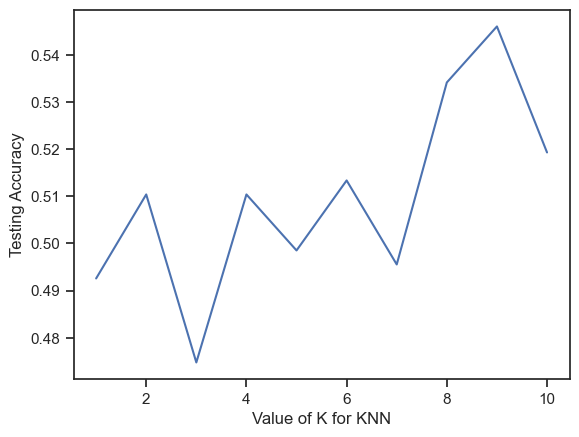

In [238]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score # Import cross_val_score from the correct module

# Assuming y_train contains continuous values, discretize it:
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')  # You can adjust n_bins
y_train_discretized = kbd.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel() # Convert to NumPy array using .to_numpy()
y_test_discretized = kbd.transform(y_test.to_numpy().reshape(-1, 1)).ravel() # Convert to NumPy array using .to_numpy()
#visualize the best number of neighbors
k_range = range(1, 11)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_discretized)
    y_pred = knn.predict(X_test)
    # Calculate accuracy using y_test_discretized and y_pred (predictions on the test set)
    scores.append(accuracy_score(y_test_discretized, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

#### Train a KNN Classifier

In [257]:
# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train_discretized)


KNeighborsClassifier(n_neighbors=6)

#### KNN Model Evaluation

In [258]:
# Predict and evaluate
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_discretized, y_pred)
precision = precision_score(y_test_discretized, y_pred, average='weighted')
recall = recall_score(y_test_discretized, y_pred, average='weighted')
f1 = f1_score(y_test_discretized, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_discretized, y_pred))

# Discretize the full target variable 'y'
y_discretized = kbd.fit_transform(y.to_numpy().reshape(-1, 1)).ravel()

# Perform cross-validation using the discretized target variable
cv_scores = cross_val_score(knn, X, y_discretized, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Accuracy: 0.51
Precision: 0.49
Recall: 0.51
F1 Score: 0.49

Classification Report:
              precision    recall  f1-score   support

         0.0       0.27      0.29      0.28        41
         1.0       0.59      0.73      0.65       188
         2.0       0.40      0.22      0.29       108

    accuracy                           0.51       337
   macro avg       0.42      0.41      0.41       337
weighted avg       0.49      0.51      0.49       337

Cross-Validation Accuracy: 0.52 ± 0.01


#### Hyperparameter Tuning


In [256]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 6, 7, 9]}

# Initialize Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_discretized)  # Use discretized target

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'n_neighbors': 6}
Best Cross-Validation Accuracy: 0.51


### XGBoost Classifier

#### Train Model

In [242]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go

In [249]:
def train_xgboost_model(X_train, y_train, params=None):
    """Train XGBoost model with given parameters."""
    if params is None:
        params = {
            'max_depth': 6, # Common range: 3-10
            'learning_rate': 0.1, # Smaller = more robust but slower
            'n_estimators': 100, # 100 trees is good starting point, Can increase if underfitting
            'objective': 'multi:softmax', # Multiclass classification
            'num_class': 3 ,# Matches our target variable
            'eval_metric': ['merror', 'mlogloss']
        }
    model = xgb.XGBClassifier(**params)
    model.fit(
        X_train,
        y_train_discretized,
        eval_set=[(X_train, y_train_discretized)],
        verbose=True
    )

    return model
model = train_xgboost_model(X_train, y_train_discretized)
#used API provided by xgboost
eval_results = model.evals_result()

[0]	validation_0-merror:0.35386	validation_0-mlogloss:1.06097
[1]	validation_0-merror:0.34644	validation_0-mlogloss:1.02772
[2]	validation_0-merror:0.34792	validation_0-mlogloss:0.99836
[3]	validation_0-merror:0.34792	validation_0-mlogloss:0.97268
[4]	validation_0-merror:0.34570	validation_0-mlogloss:0.94981
[5]	validation_0-merror:0.34644	validation_0-mlogloss:0.92888
[6]	validation_0-merror:0.34718	validation_0-mlogloss:0.91028
[7]	validation_0-merror:0.34421	validation_0-mlogloss:0.89371
[8]	validation_0-merror:0.34050	validation_0-mlogloss:0.87733
[9]	validation_0-merror:0.34125	validation_0-mlogloss:0.86221
[10]	validation_0-merror:0.33234	validation_0-mlogloss:0.84867
[11]	validation_0-merror:0.33012	validation_0-mlogloss:0.83602
[12]	validation_0-merror:0.32641	validation_0-mlogloss:0.82478
[13]	validation_0-merror:0.32641	validation_0-mlogloss:0.81378
[14]	validation_0-merror:0.33086	validation_0-mlogloss:0.80432
[15]	validation_0-merror:0.32715	validation_0-mlogloss:0.79483
[1

#### Evaluate Model

In [250]:
#check scikitlearn version
import sklearn
print(sklearn.__version__)

1.5.2


In [251]:
from sklearn.model_selection import  cross_val_score, KFold # Import KFold
def evaluate_model(model, X_test, y_test):
    """Evaluate model performance."""
    predictions = model.predict(X_test)
    # Use KFold for cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Create KFold object
    cv_scores = cross_val_score(model, X_test, y_test_discretized, cv=kf)  # Use KFold object in cross_val_score
    results = {
        'accuracy': accuracy_score(y_test_discretized, predictions),
        'classification_report': classification_report(y_test_discretized, predictions),
        'confusion_matrix': confusion_matrix(y_test_discretized, predictions),
        'cv_scores': cv_scores
    }

    return results

# Evaluate
results = evaluate_model(model, X_test, y_test_discretized)
print(f"Accuracy: {results['accuracy']:.4f}")
print(f"CV Mean: {results['cv_scores'].mean():.4f} (+/- {results['cv_scores'].std()*2:.4f})")
print("\nClassification Report:")
print(results['classification_report'])

Accuracy: 0.5045
CV Mean: 0.4750 (+/- 0.0992)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.31      0.24      0.27        41
         1.0       0.58      0.71      0.64       188
         2.0       0.36      0.25      0.29       108

    accuracy                           0.50       337
   macro avg       0.42      0.40      0.40       337
weighted avg       0.48      0.50      0.48       337



#### Visualizations

In [252]:
def plot_feature_importance(model, feature_names):
    """Plot feature importance."""
    importance = model.feature_importances_
    fig = px.bar(
        x=feature_names,
        y=importance,
        title='Feature Importance in Student Performance Prediction'
    )
    fig.show()

def plot_learning_curves(results):
    """Plot learning curves to interpret the performance of XGBoost model"""
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        y=results['validation_0']['merror'],
        name='Train Error'
    ))

    fig.add_trace(go.Scatter(
        y=results['validation_0']['mlogloss'],
        name='Train Log Loss'
    ))

    fig.update_layout(
        title='XGBoost Learning Curves',
        xaxis_title='Iterations',
        yaxis_title='Error'
    )
    fig.show()

# Visualize
plot_feature_importance(model, X_train.columns)
plot_learning_curves(model.evals_result())

In [247]:
print(results)

{'accuracy': 0.5044510385756676, 'classification_report': '              precision    recall  f1-score   support\n\n         0.0       0.31      0.24      0.27        41\n         1.0       0.58      0.71      0.64       188\n         2.0       0.36      0.25      0.29       108\n\n    accuracy                           0.50       337\n   macro avg       0.42      0.40      0.40       337\nweighted avg       0.48      0.50      0.48       337\n', 'confusion_matrix': array([[ 10,  23,   8],
       [ 14, 133,  41],
       [  8,  73,  27]]), 'cv_scores': array([0.48529412, 0.39705882, 0.47761194, 0.55223881, 0.46268657])}


#### Interpret Feature Importance

In [259]:
def interpret_xgboost_results(model, evaluation_results):
    """Interpret XGBoost model results with insights and visualizations."""

    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Get learning curves
    learning_curves = model.evals_result()
    train_error = learning_curves['validation_0']['merror']
    val_loss = learning_curves['validation_0']['mlogloss']

    # Analyze convergence and overfitting
    convergence = 'Good' if train_error[-1] < 0.1 else 'Poor'
    overfitting_status = 'Potential overfitting' if results['cv_scores'].std() > 0.1 else 'No significant overfitting'

    # Create interpretations
    interpretations = {
        'feature_importance': {
            'most_important': feature_importance.head(3)['feature'].tolist(),
            'least_important': feature_importance.tail(3)['feature'].tolist(),
        },
        'performance_metrics': results,
        'learning_curves': {
            'convergence': convergence,
            'overfitting_status': overfitting_status
        }
    }

    # Print insights
    print("\n=== XGBoost Model Interpretation ===")
    print("\n1. Feature Importance:")
    print(f"   Top features: {', '.join(interpretations['feature_importance']['most_important'])}")
    print(f"   Least important features: {', '.join(interpretations['feature_importance']['least_important'])}")

    print("\n2. Model Performance:")
    print(f"   Accuracy: {results['accuracy']:.2f}")
    print(f"   Overfitting Status: {overfitting_status}")

    print("\n3. Recommendations:")
    if 'technical_skills' in interpretations['feature_importance']['most_important']:
        print("   - Strengthen technical skills curriculum.")
    if 'soft_skills' in interpretations['feature_importance']['most_important']:
        print("   - Enhance soft skills development.")

    return interpretations
